# **LATAR BELAKANG**

&emsp;&emsp;Bertambahnya perusahaan di Indonesia menyebabkan persaingan didalam dunia perdagangan semakin ketat.&nbsp;&nbsp;Berdasarkan hasil sensus ekonomi Badan Pusat Statistik pada tahun 2014, terdapat 3,52 juta perusahaan di seluruh Indonesia.&nbsp;&nbsp;Apabila dibandingkan dengan hasil sensus ekonomi pada tahun 2013,&nbsp;dimana jumlah perusahaan di Indonesia adalah 3,44 juta,&nbsp;terdapat peningkatan jumlah perusahaan sebesar 80 ribu atau 2,27% dalam 1 tahun terakhir.&nbsp;&nbsp;Meningkatnya jumlah perusahaan di Indonesia menuntut setiap perusahaan untuk berusaha lebih untuk meningkatkan bisinisnya.

&emsp;&emsp;Beberapa hal yang berperan penting dalam meningkatkan bisnis adalah pemasaran dan rantai pasok.&nbsp;&nbsp;Pemasaran berperan penting dalam membantu perusahaan mencapai target bisnisnya.&nbsp;&nbsp;Menurut Kotler dan Amstrong (2018), pemasaran merupakan suatu tahapan bagi perusahaan dalam menghasilkan nilai untuk konsumen serta menciptakan relasi yang erat dengan konsumen yang berguna untuk mengetahui nilai dari konsumen sebagai balasannya.&nbsp;&nbsp;Selain itu berdasarkan model penelitian Li, Nathan dan Rao (2006) dalam Pramana (2015) yang dilakukan pada perusahaan manufaktur skala besar di Indonesia,&nbsp;&nbsp;terdapat keterkaitan antara manajemen rantai pasok,&nbsp;&nbsp;keunggulan kompetitif,&nbsp;&nbsp;dan kinerja bisnis perusahaan.&nbsp;&nbsp;Keunggulan kompetitif akan membawa dampak pada peningkatan kinerja perusahaan, kepuasan konsumen, loyalitas konsumen, dan efektivitas hubungan antar perusahaan dalam rantai pasok khususnya terkait dengan reliabilitas,responsiveness, fleksibilitas, biaya dan aset.

&nbsp;&nbsp;Sebuah perusahaan yang bergerak dalam bidang retail hendak menentukan strategi pemasaran dan rantai pasok yang tepat untuk perusahaannya.&nbsp;&nbsp;Dalam menentukan strategi pemasaran dan rantai pasok yang efektif, perusahaan harus dapat memahami ciri-ciri dan perilaku konsumennya agar strategi pemasaran yang diciptakan tepat sasaran dan dapat menyediakan produk yang tepat, pada waktu yang tepat, dan untuk orang yang tepat. Oleh karena itu diperlukan analisa perilaku konsumen untuk memahami karakteristik dan kecenderungan dari konsumen.

# **RUMUSAN MASALAH**

1. Apa saja faktor yang mempengaruhi perilaku konsumen dalam membeli produk?
2. Bagaimana hubungan antara karakteristik konsumen dengan produk yang dibeli, platform yang dipilih, dan promosi?

# **ASUMSI**

1. Data ditarik pada akhir bulan 31 Januari 2015

# **PENGOLAHAN DATA**

### **I : IMPORT LIBRARY**

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from datetime import date
from datetime import datetime

from scipy.stats import normaltest,kruskal,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

from dataprep import eda

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


### **II : READ DATASET AWAL**

In [3]:
pd.set_option('display.max_column',None)
main_df = pd.read_csv('marketing_campaign.csv', sep = '\t')
df = main_df.copy()
df.head(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0

In [4]:
df = df.rename(columns={'MntWines':'Wine','MntFruits':'Fruit','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweet','MntGoldProds':'Gold',
'AcceptedCmp1':'Cmp_1','AcceptedCmp2':'Cmp_2','AcceptedCmp3':'Cmp_3','AcceptedCmp4':'Cmp_4','AcceptedCmp5':'Cmp_5','NumWebPurchases':'Web','NumCatalogPurchases':'Catalog'
,'NumStorePurchases':'Store','NumWebVisitsMonth':'Web_Visit_Month','NumDealsPurchases':'Deals_Purchases'})

df.head(3)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  Wine  Fruit  Meat  Fish  Sweet  Gold  Deals_Purchases  \
0  04-09-2012       58   635     88   546   172     88    88                3   
1  08-03-2014       38    11      1     6     2      1     6                2   
2  21-08-2013       26   426     49   127   111     21    42                1   

   Web  Catalog  Store  Web_Visit_Month  Cmp_3  Cmp_4  Cmp_5  Cmp_1  Cmp_2  \
0    8       10      4                7      0      0      0      0      0   
1    1        1      2                5      0      0      0      0      0   
2    8        2     10                4      0      0      0      0      0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0

### **III : PEMAHAMAN DATASET AWAL**

People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### **IV : INFORMASI DATASET AWAL**

In [5]:
# eda.create_report(df, title="Informasi Dataset Awal", config={'bar.bars': 10, 'bar.sort_descending': True, 'bar.yscale': 'linear', 'height': 600, 'width': 450, })

##### IV.1 UKURAN DATASET AWAL

In [6]:
df.shape

(2240, 29)

##### IV.2 INFORMASI KOMPLIT DATASET AWAL

In [7]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2240 non-null   int64  
 1   Year_Birth       2240 non-null   int64  
 2   Education        2240 non-null   object 
 3   Marital_Status   2240 non-null   object 
 4   Income           2216 non-null   float64
 5   Kidhome          2240 non-null   int64  
 6   Teenhome         2240 non-null   int64  
 7   Dt_Customer      2240 non-null   object 
 8   Recency          2240 non-null   int64  
 9   Wine             2240 non-null   int64  
 10  Fruit            2240 non-null   int64  
 11  Meat             2240 non-null   int64  
 12  Fish             2240 non-null   int64  
 13  Sweet            2240 non-null   int64  
 14  Gold             2240 non-null   int64  
 15  Deals_Purchases  2240 non-null   int64  
 16  Web              2240 non-null   int64  
 17  Catalog       

##### IV.3 SUMMARY DATASET AWAL

In [8]:
summary = df.describe()
summary

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency         Wine        Fruit         Meat         Fish  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean     49.109375   303.935714    26.302232   166.950000    37.525446   
std      28.962453   336.597393    39.773434   225.715373    54.628979   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      24.000000    23.750000     1.000000    16.000000     3.000000   
50%      49.000000   173.500000     8.000000    67.000000    12.000000   
75%      74.000000   504.250000    33.000000   232.000000    50.000000   
max      99.000000  1493.000000   199.000000  1725.000000   259.000000   

             Sweet         Gold  Deals_Purchases          Web      Catalog  \
count  2240.000000  2240.000000      2240.000000  2240.000000  2240.000000   
mean     27.062946    44.021875         2.325000     4.084821     2.662054   
std      41.280498    52.167439         1.932238     2.778714     2.923101   
min       0.000000     0.000000         0.000000     0.000000     0.000000   
25%       1.000000     9.000000         1.000000     2.000000     0.000000   
50%       8.000000    24.000000         2.000000     4.000000     2.000000   
75%      33.000000    56.000000         3.000000     6.000000     4.000000   
max     263.000000   362.000000        15.000000    27.000000    28.000000   

             Store  Web_Visit_Month        Cmp_3        Cmp_4        Cmp_5  \
count  2240.000000      2240.000000  2240.000000  2240.000000  2240.000000   
mean      5.790179         5.316518     0.072768     0.074554     0.072768   
std       3.250958         2.426645     0.259813     0.262728     0.259813   
min       0.000000         0.000000     0.000000     0.000000     0.000000   
25%       3.000000         3.000000     0.000000     0.000000     0.000000   
50%       5.000000         6.000000     0.000000     0.000000     0.000000   
75%       8.000000         7.000000     0.000000     0.000000     0.000000   
max      13.000000        20.000000     1.000000     1.000000     1.000000   

             Cmp_1        Cmp_2     Complain  Z_CostContact  Z_Revenue  \
count  2240.000000  2240.000000  2240.000000         2240.0     2240.0   
mean      0.064286     0.013393     0.009375            3.0       11.0   
std       0.245316     0.114976     0.096391            0.0        0.0   
min       0.000000     0.000000     0.000000            3.0       11.0   
25%       0.000000     0.000000     0.000000            3.0       11.0   
50%       0.000000     0.000000     0.000000            3.0       11.0   
75%       0.000000     0.000000     0.000000            3.0       11.0   
max       1.000000     1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

##### IV.4 NILAI DUPLIKAT DATASET AWAL

In [9]:
df.duplicated().sum()

0

##### IV.5 NILAI NULL DATASET AWAL

In [10]:
Total = df.isna().sum()
Percentage = (df.isna().sum()/len(df)*100).round(3)

Missing_Values_Data = pd.concat([Total, Percentage], axis=1, keys=['Total', 'Percentage (%)']).sort_values('Total', ascending = False).T
Missing_Values_Data

Income   ID  Deals_Purchases  Z_Revenue  Z_CostContact  \
Total           24.000  0.0              0.0        0.0            0.0   
Percentage (%)   1.071  0.0              0.0        0.0            0.0   

                Complain  Cmp_2  Cmp_1  Cmp_5  Cmp_4  Cmp_3  Web_Visit_Month  \
Total                0.0    0.0    0.0    0.0    0.0    0.0              0.0   
Percentage (%)       0.0    0.0    0.0    0.0    0.0    0.0              0.0   

                Store  Catalog  Web  Gold  Year_Birth  Sweet  Fish  Meat  \
Total             0.0      0.0  0.0   0.0         0.0    0.0   0.0   0.0   
Percentage (%)    0.0      0.0  0.0   0.0         0.0    0.0   0.0   0.0   

                Fruit  Wine  Recency  Dt_Customer  Teenhome  Kidhome  \
Total             0.0   0.0      0.0          0.0       0.0      0.0   
Percentage (%)    0.0   0.0      0.0          0.0       0.0      0.0   

                Marital_Status  Education  Response  
Total                      0.0        0.0       0.0  
Percentage (%)             0.0        0.0       0.0

##### IV.6 NILAI UNIK DATASET AWAL

In [11]:
n_unik = pd.DataFrame(df.nunique()).rename(columns={0:'Total Unik'}).T
n_unik

ID  Year_Birth  Education  Marital_Status  Income  Kidhome  \
Total Unik  2240          59          5               8    1974        3   

            Teenhome  Dt_Customer  Recency  Wine  Fruit  Meat  Fish  Sweet  \
Total Unik         3          663      100   776    158   558   182    177   

            Gold  Deals_Purchases  Web  Catalog  Store  Web_Visit_Month  \
Total Unik   213               15   15       14     14               16   

            Cmp_3  Cmp_4  Cmp_5  Cmp_1  Cmp_2  Complain  Z_CostContact  \
Total Unik      2      2      2      2      2         2              1   

            Z_Revenue  Response  
Total Unik          1         2

### **V : PENGOLAHAN DATASET AWAL**

##### V.1 PENAMBAHAN KOLOM

In [12]:
df.head(1)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  Wine  Fruit  Meat  Fish  Sweet  Gold  Deals_Purchases  \
0  04-09-2012       58   635     88   546   172     88    88                3   

   Web  Catalog  Store  Web_Visit_Month  Cmp_3  Cmp_4  Cmp_5  Cmp_1  Cmp_2  \
0    8       10      4                7      0      0      0      0      0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1

In [13]:
summary

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency         Wine        Fruit         Meat         Fish  \
count  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean     49.109375   303.935714    26.302232   166.950000    37.525446   
std      28.962453   336.597393    39.773434   225.715373    54.628979   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      24.000000    23.750000     1.000000    16.000000     3.000000   
50%      49.000000   173.500000     8.000000    67.000000    12.000000   
75%      74.000000   504.250000    33.000000   232.000000    50.000000   
max      99.000000  1493.000000   199.000000  1725.000000   259.000000   

             Sweet         Gold  Deals_Purchases          Web      Catalog  \
count  2240.000000  2240.000000      2240.000000  2240.000000  2240.000000   
mean     27.062946    44.021875         2.325000     4.084821     2.662054   
std      41.280498    52.167439         1.932238     2.778714     2.923101   
min       0.000000     0.000000         0.000000     0.000000     0.000000   
25%       1.000000     9.000000         1.000000     2.000000     0.000000   
50%       8.000000    24.000000         2.000000     4.000000     2.000000   
75%      33.000000    56.000000         3.000000     6.000000     4.000000   
max     263.000000   362.000000        15.000000    27.000000    28.000000   

             Store  Web_Visit_Month        Cmp_3        Cmp_4        Cmp_5  \
count  2240.000000      2240.000000  2240.000000  2240.000000  2240.000000   
mean      5.790179         5.316518     0.072768     0.074554     0.072768   
std       3.250958         2.426645     0.259813     0.262728     0.259813   
min       0.000000         0.000000     0.000000     0.000000     0.000000   
25%       3.000000         3.000000     0.000000     0.000000     0.000000   
50%       5.000000         6.000000     0.000000     0.000000     0.000000   
75%       8.000000         7.000000     0.000000     0.000000     0.000000   
max      13.000000        20.000000     1.000000     1.000000     1.000000   

             Cmp_1        Cmp_2     Complain  Z_CostContact  Z_Revenue  \
count  2240.000000  2240.000000  2240.000000         2240.0     2240.0   
mean      0.064286     0.013393     0.009375            3.0       11.0   
std       0.245316     0.114976     0.096391            0.0        0.0   
min       0.000000     0.000000     0.000000            3.0       11.0   
25%       0.000000     0.000000     0.000000            3.0       11.0   
50%       0.000000     0.000000     0.000000            3.0       11.0   
75%       0.000000     0.000000     0.000000            3.0       11.0   
max       1.000000     1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [14]:
# Umur konsumen 
# Data = Year_Birth
df['Age'] = (2015 - df['Year_Birth'])

In [15]:
# Klasifikasi Income
max_income = summary.loc['max','Income']
min_income = summary.loc['min','Income']
Range_income = max_income - min_income
max_income, min_income, Range_income

(666666.0, 1730.0, 664936.0)

In [16]:
Q1 = summary.loc['25%','Income']
Q3 = summary.loc['75%','Income']
IQR = Q3 - Q1
Q1,Q3,IQR

(35303.0, 68522.0, 33219.0)

Klasifikasi Income :

- Low&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;:&emsp;&emsp;&emsp;&nbsp;0     <= x < 35303   
- Lower-middle&emsp;:&emsp;35303   <= x < 51381.5 
- Upper-middle&emsp;: 51381.5 <= x < 68522   
- High&emsp;&emsp;&emsp;&emsp;&emsp;:&emsp;68522   <= x < 118350.5

In [17]:
list_klasifikasi = []

for i in range (len(df)) :
    if df['Income'][i] < 35303 :
        list_klasifikasi.append('Low')
    elif df['Income'][i] < 51381.5 and df['Income'][i] >= 35303 :
        list_klasifikasi.append('Lower Middle')
    elif df['Income'][i] < 68522 and df['Income'][i] >= 51381.5 :
        list_klasifikasi.append('Upper Middle')
    else :
        list_klasifikasi.append('High')

In [18]:
df['Income_Classification'] = list_klasifikasi

In [19]:
# Total anak
df['Children'] = df['Kidhome']+df['Teenhome']

In [20]:
# Lamanya seseorang menjadi konsumen
# Data = Dt_Customer
df['Get_Data'] = pd.to_datetime('2015-01-31')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Days_From_Join'] = df['Get_Data']-df['Dt_Customer']
df['Days_From_Join'] = df['Days_From_Join'].astype(str).str.split(' days',expand = True)[0].astype(int)


In [21]:
# Produk yang dengan alokasi uang terbanyak
df['Biggest_Allocation'] = df[['Wine','Fruit','Meat','Fish','Sweet','Gold']].idxmax(axis = 1)

In [22]:
# Total pengeluaran
# Data = MntWines + MntFruits
df['Total_Expenses'] = df['Wine'] + df['Fruit'] + df['Meat'] + df['Fish'] + df['Sweet'] + df['Gold']

In [23]:
# Media yang paling sering digunakan dalam pembelian produk
df['Frequently_Used'] = df[['Web','Store','Catalog']].idxmax(axis = 1)

In [24]:
# Jumlah Pembelian
df['Shopping_Amount'] = df['Web']+df['Store']+df['Catalog']

In [25]:
# Total accepted campaign
df['Total_Accepted_Campaign'] = df['Cmp_1'] + df['Cmp_2'] + df['Cmp_3'] + df['Cmp_4'] + df['Cmp_5']

##### V.2 PENGURANGAN KOLOM

In [26]:
summary.loc[['std'],['Z_CostContact', 'Z_Revenue']]

Z_CostContact  Z_Revenue
std            0.0        0.0

In [27]:
# Berdasarkan  summary, standar deviasi untuk Z_CostContact dan Z_Revenue adalah 0, artinya semua nilainya sama
# Kolom Year_Birth telah dikalkulasi menjadi Kolom Age
# Kolom Dt_Customer dan Get_Data telah dikalkulasi menjadi kolom Days_From_Join
# Kolom Kidhome dan Teenhome telah dikalkulasi menjadi Kolom Childrem
# sehingga, Kolom Z_CostContact, Z_Revenue, Year_Birth, Dt_Customer bisa dihapus

df = df.drop(columns=['Z_CostContact', 'Z_Revenue','Year_Birth','Dt_Customer','Get_Data','Kidhome','Teenhome'],axis=1)

In [28]:
df.head(1)

ID   Education Marital_Status   Income  Recency  Wine  Fruit  Meat  Fish  \
0  5524  Graduation         Single  58138.0       58   635     88   546   172   

   Sweet  Gold  Deals_Purchases  Web  Catalog  Store  Web_Visit_Month  Cmp_3  \
0     88    88                3    8       10      4                7      0   

   Cmp_4  Cmp_5  Cmp_1  Cmp_2  Complain  Response  Age Income_Classification  \
0      0      0      0      0         0         1   58          Upper Middle   

   Children  Days_From_Join Biggest_Allocation  Total_Expenses  \
0         0            1027               Wine            1617   

  Frequently_Used  Shopping_Amount  Total_Accepted_Campaign  
0         Catalog               22                        0

In [29]:
df.shape

(2240, 32)

##### V.3 PENGATURAN URUTAN KOLOM

In [30]:
df = df[['ID', 'Age','Education','Marital_Status','Children','Income','Income_Classification','Days_From_Join','Recency','Complain',
             'Wine', 'Fruit','Meat', 'Fish', 'Sweet','Gold','Biggest_Allocation','Total_Expenses',
             'Cmp_1','Cmp_2','Cmp_3','Cmp_4','Cmp_5','Total_Accepted_Campaign','Response','Deals_Purchases',
             'Web','Catalog','Store','Shopping_Amount','Frequently_Used','Web_Visit_Month']]

People
- ID : Nomor identitas konsumen
- Age : Usia konsumen
- Education : Tingkat pendidikan konsumen
- Marital_Status : Status pernikahan konsumen
- Children : Jumlah anak yang tinggal bersama konsumen
- Income : Pendapatan konsumen per tahun
- Income_Classification : Kategori konsumen berdasarkan jumlah pendapatan per tahun
- Days_From_Join : Jumlah hari sejak konsumen pertama kali mendaftar
- Recency : Jumlah hari sejak pembelian terakhir konsumen
- Complain : 1 jika pelanggan komplain dalam 2 tahun terakhir, 0 jika sebaliknya

Products
- Wine : Jumlah uang yang dialokasikan untuk pembelian anggur(minuman) selama 2 tahun
- Fruit : Jumlah uang yang dialokasikan untuk pembelian buah selama 2 tahun
- Meat : Jumlah uang yang dialokasikan untuk pembelian daging selama 2 tahun
- Fish : Jumlah uang yang dialokasikan untuk pembelian ikan selama 2 tahun
- Sweet : Jumlah uang yang dialokasikan untuk pembelian produk manis selama 2 tahun
- Gold : Jumlah uang yang dialokasikan untuk pembelian emas selama 2 tahun
- Biggest_Allocation : Produk dengan jumlah alokasi uang terbanyak
- Total_Expenses : Jumlah uang yang dialokasikan untuk berbelanja selama 2 tahun

Promotion
- Cmp_1 : 1 jika konsumen menerima penawaran di 1st campaign, 0 jika sebaliknya
- Cmp_2 : 1 jika konsumen menerima penawaran di 2nd campaign, 0 jika sebaliknya
- Cmp_3 : 1 jika konsumen menerima penawaran di 3rd campaign, 0 jika sebaliknya
- Cmp_4 : 1 jika konsumen menerima penawaran di 4th campaign, 0 jika sebaliknya
- Cmp_5 : 1 jika konsumen menerima penawaran di 5th campaign, 0 jika sebaliknya
- Total_Accepted_Campaign : jumlah konsumen menerima penawaran 
- Response : 1 jika konsumen menerima penawaran di kampanye terakhir, 0 sebaliknya
- Deals_Purchases : Jumlah pembelian dengan potongan harga

Place
- Web : Number of purchases made through the company’s website
- Catalog : Number of purchases made using a catalogue
- Store : Number of purchases made directly in stores
- Shopping_Amount : Jumlah konsumen berbelanja
- Frequent_Used : Platform yang paling sering digunakan dalam berbelanja
- Web_Visit_Month : Jumlah konsumen mengunjungi website pada bulan terakhir
<br><br>

Notes : menerima penawaran bukan berarti membeli, konsumen hanya membuka iklan penawaran

##### V.4 PENGELOMPOKAN KEMBALI ISI KOLOM

In [31]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [32]:
Single = ['Single','Absurd','YOLO','Alone','Divorced','Widow']
Together = ['Together','Married']

In [33]:
list_status = []

for i in df['Marital_Status'] :
    if i in Single :
        list_status.append('Single')
    else :
        list_status.append('Together')

df['Marital_Status'] = list_status

### **VI : ANALISA STATISTIK**

##### VI.1 Distribusi Data

In [34]:
# Mencari semua kolom numerik
nama_kolom = list(df.columns)
nama_kolom.remove('Education')          # remove semua kolom kategorikal
nama_kolom.remove('Marital_Status')     
nama_kolom.remove('Income_Classification')
nama_kolom.remove('Complain')
nama_kolom.remove('Children')
nama_kolom.remove('Biggest_Allocation')
nama_kolom.remove('Cmp_1')
nama_kolom.remove('Cmp_2')
nama_kolom.remove('Cmp_3')
nama_kolom.remove('Cmp_4')
nama_kolom.remove('Cmp_5')
nama_kolom.remove('Total_Accepted_Campaign')
nama_kolom.remove('Response')
nama_kolom.remove('Frequently_Used')
nama_kolom.remove('ID')                 # remove karena ID tidak berpengaruh terhadap apapun
pd.DataFrame(nama_kolom).T

0       1               2        3     4      5     6     7      8     9   \
0  Age  Income  Days_From_Join  Recency  Wine  Fruit  Meat  Fish  Sweet  Gold   

               10               11   12       13     14               15  \
0  Total_Expenses  Deals_Purchases  Web  Catalog  Store  Shopping_Amount   

                16  
0  Web_Visit_Month

Hypothesis
- Ho: Data terdistribusi normal
- Ha: Data tidak terdistribusi normal

In [35]:
# Looping uji normalitas untuk semua kolom numerik
# normaltest dipilih karena dapat menangani jumlah data lebih dari 1000

list_kolom = []
list_distribusi = []

for i in nama_kolom :
    stat, pvalue = normaltest(df[i].dropna())
    if pvalue > 0.05:
        list_distribusi.append('Normal')
    else:
        list_distribusi.append('Tidak Normal')
    list_kolom.append(i)

df_distribusi = pd.DataFrame(list_distribusi,list_kolom)
df_distribusi.rename(columns={0:'Distribusi'}, inplace=True)
df_distribusi.T

Age        Income Days_From_Join       Recency  \
Distribusi  Tidak Normal  Tidak Normal   Tidak Normal  Tidak Normal   

                    Wine         Fruit          Meat          Fish  \
Distribusi  Tidak Normal  Tidak Normal  Tidak Normal  Tidak Normal   

                   Sweet          Gold Total_Expenses Deals_Purchases  \
Distribusi  Tidak Normal  Tidak Normal   Tidak Normal    Tidak Normal   

                     Web       Catalog         Store Shopping_Amount  \
Distribusi  Tidak Normal  Tidak Normal  Tidak Normal    Tidak Normal   

           Web_Visit_Month  
Distribusi    Tidak Normal

Analisa
- Semua data numerikal memiliki distribusi Tidak Normal

##### VI.1 Korelasi

**1 . Numerikal vs Numerikal**

In [36]:
df_correlation = df[['Age','Income','Days_From_Join','Recency','Wine','Fruit','Meat','Fish','Sweet','Gold','Total_Expenses','Deals_Purchases','Web','Catalog','Store','Shopping_Amount','Web_Visit_Month']].corr(method='spearman')
df_correlation

Age    Income  Days_From_Join   Recency      Wine  \
Age              1.000000  0.217063       -0.028131  0.020661  0.234200   
Income           0.217063  1.000000       -0.026099  0.007938  0.830056   
Days_From_Join  -0.028131 -0.026099        1.000000  0.024415  0.135817   
Recency          0.020661  0.007938        0.024415  1.000000  0.018662   
Wine             0.234200  0.830056        0.135817  0.018662  1.000000   
Fruit            0.025445  0.582379        0.120152  0.025295  0.517544   
Meat             0.112499  0.816815        0.143315  0.027822  0.823652   
Fish             0.030594  0.577392        0.135323  0.013305  0.524609   
Sweet           -0.003176  0.567087        0.113859  0.024196  0.505322   
Gold             0.076580  0.505550        0.215169  0.018376  0.575345   
Total_Expenses   0.156773  0.850920        0.168713  0.019927  0.927003   
Deals_Purchases  0.086778 -0.195533        0.194179  0.007734  0.057165   
Web              0.164416  0.573262        0.184634 -0.003939  0.740195   
Catalog          0.178769  0.791841        0.117709  0.030690  0.823421   
Store            0.167646  0.731752        0.107201  0.005543  0.806918   
Shopping_Amount  0.177103  0.777879        0.149648  0.011708  0.867686   
Web_Visit_Month -0.131069 -0.643667        0.279984 -0.021892 -0.389039   

                    Fruit      Meat      Fish     Sweet      Gold  \
Age              0.025445  0.112499  0.030594 -0.003176  0.076580   
Income           0.582379  0.816815  0.577392  0.567087  0.505550   
Days_From_Join   0.120152  0.143315  0.135323  0.113859  0.215169   
Recency          0.025295  0.027822  0.013305  0.024196  0.018376   
Wine             0.517544  0.823652  0.524609  0.505322  0.575345   
Fruit            1.000000  0.713169  0.705016  0.691356  0.568750   
Meat             0.713169  1.000000  0.726242  0.695704  0.637912   
Fish             0.705016  0.726242  1.000000  0.700871  0.565283   
Sweet            0.691356  0.695704  0.700871  1.000000  0.542963   
Gold             0.568750  0.637912  0.565283  0.542963  1.000000   
Total_Expenses   0.682386  0.939382  0.695620  0.670111  0.692576   
Deals_Purchases -0.109789 -0.032182 -0.119759 -0.105984  0.089728   
Web              0.471341  0.679243  0.466423  0.463586  0.579978   
Catalog          0.634782  0.851660  0.657124  0.627906  0.649037   
Store            0.583358  0.779336  0.582713  0.580889  0.539864   
Shopping_Amount  0.626960  0.860675  0.632657  0.627373  0.646884   
Web_Visit_Month -0.442861 -0.492302 -0.458360 -0.448597 -0.260587   

                 Total_Expenses  Deals_Purchases       Web   Catalog  \
Age                    0.156773         0.086778  0.164416  0.178769   
Income                 0.850920        -0.195533  0.573262  0.791841   
Days_From_Join         0.168713         0.194179  0.184634  0.117709   
Recency                0.019927         0.007734 -0.003939  0.030690   
Wine                   0.927003         0.057165  0.740195  0.823421   
Fruit                  0.682386        -0.109789  0.471341  0.634782   
Meat                   0.939382        -0.032182  0.679243  0.851660   
Fish                   0.695620        -0.119759  0.466423  0.657124   
Sweet                  0.670111        -0.105984  0.463586  0.627906   
Gold                   0.692576         0.089728  0.579978  0.649037   
Total_Expenses         1.000000        -0.014822  0.727355  0.891919   
Deals_Purchases       -0.014822         1.000000  0.284167 -0.039785   
Web                    0.727355         0.284167  1.000000  0.619499   
Catalog                0.891919        -0.039785  0.619499  1.000000   
Store                  0.804777         0.099629  0.672625  0.708612   
Shopping_Amount        0.908302         0.108840  0.833595  0.870517   
Web_Visit_Month       -0.476343         0.397849 -0.097222 -0.536245   

                    Store  Shopping_Amount  Web_Visit_Month  
Age              0.167646         0.177103        -0.131069  
Income 

**2. Kategorikal vs Numerikal**

In [37]:
df.head(1)

ID  Age   Education Marital_Status  Children   Income  \
0  5524   58  Graduation         Single         0  58138.0   

  Income_Classification  Days_From_Join  Recency  Complain  Wine  Fruit  Meat  \
0          Upper Middle            1027       58         0   635     88   546   

   Fish  Sweet  Gold Biggest_Allocation  Total_Expenses  Cmp_1  Cmp_2  Cmp_3  \
0   172     88    88               Wine            1617      0      0      0   

   Cmp_4  Cmp_5  Total_Accepted_Campaign  Response  Deals_Purchases  Web  \
0      0      0                        0         1                3    8   

   Catalog  Store  Shopping_Amount Frequently_Used  Web_Visit_Month  
0       10      4               22         Catalog                7

Diketahui :

        - Kolom kategorikal : Education, Marital_Status, Income_Classification, Complain, Children, Biggest_Allocation, Cmp_1, Cmp_2, Cmp_3, Cmp_4, Cmp_5, Cmp_6, Total_Accepted_Campaign, Response, Frequently_Used
        - Semua Data Numerik tidak terdistribrusi normal

Metode : 

        - Kruskal Wallis Test

**2a. Education**

In [38]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Hypothesis
- Ho: Median dari kelima kelompok customer adalah SAMA
- Ha: Minimal ada 1 kelompok customer yang mediannya berbeda.

In [39]:
list_kolom = []
list_hasil = []

for i in nama_kolom :
    stat, pvalue = kruskal(
        df[df['Education']=='Graduation'][i].dropna(),
        df[df['Education']=='PhD'][i].dropna(),
        df[df['Education']=='Master'][i].dropna(),
        df[df['Education']=='Basic'][i].dropna(),
        df[df['Education']=='2n Cycle'][i].dropna())
    if pvalue > 0.05:
        list_hasil.append('Tidak Berhubungan')
    else:
        list_hasil.append('Berhubungan')
    list_kolom.append(i)

hubungan_education = pd.DataFrame(list_hasil,list_kolom)
hubungan_education.rename(columns={0:'Education'}, inplace=True)
hubungan_education.T

Age       Income Days_From_Join            Recency  \
Education  Berhubungan  Berhubungan    Berhubungan  Tidak Berhubungan   

                  Wine        Fruit         Meat         Fish        Sweet  \
Education  Berhubungan  Berhubungan  Berhubungan  Berhubungan  Berhubungan   

                  Gold Total_Expenses    Deals_Purchases          Web  \
Education  Berhubungan    Berhubungan  Tidak Berhubungan  Berhubungan   

               Catalog        Store Shopping_Amount Web_Visit_Month  
Education  Berhubungan  Berhubungan     Berhubungan     Berhubungan

**2b. Marital Status**

In [40]:
df['Marital_Status'].unique()

array(['Single', 'Together'], dtype=object)

Hypothesis
- Ho: Median dari kedelapan kelompok customer adalah SAMA
- Ha: Minimal ada 1 kelompok customer yang mediannya berbeda.

In [41]:
list_kolom = []
list_hasil = []

for i in nama_kolom :
    stat, pvalue = kruskal(
        df[df['Marital_Status']=='Single'][i].dropna(),
        df[df['Marital_Status']=='Divorced'][i].dropna(),
        df[df['Marital_Status']=='Married'][i].dropna())
    if pvalue > 0.05:
        list_hasil.append('Tidak Berhubungan')
    else:
        list_hasil.append('Berhubungan')
    list_kolom.append(i)

hubungan_marital_status = pd.DataFrame(list_hasil,list_kolom)
hubungan_marital_status.rename(columns={0:'Marital_Status'}, inplace=True)
hubungan_marital_status.T

Age       Income Days_From_Join      Recency  \
Marital_Status  Berhubungan  Berhubungan    Berhubungan  Berhubungan   

                       Wine        Fruit         Meat         Fish  \
Marital_Status  Berhubungan  Berhubungan  Berhubungan  Berhubungan   

                      Sweet         Gold Total_Expenses Deals_Purchases  \
Marital_Status  Berhubungan  Berhubungan    Berhubungan     Berhubungan   

                        Web      Catalog        Store Shopping_Amount  \
Marital_Status  Berhubungan  Berhubungan  Berhubungan     Berhubungan   

               Web_Visit_Month  
Marital_Status     Berhubungan

**2c. Income Classification**

In [42]:
df['Income_Classification'].unique()

array(['Upper Middle', 'Lower Middle', 'High', 'Low'], dtype=object)

Hypothesis
- Ho: Median dari keempat kelompok customer adalah SAMA
- Ha: Minimal ada 1 kelompok customer yang mediannya berbeda.

In [43]:
list_kolom = []
list_hasil = []

for i in nama_kolom :
    stat, pvalue = kruskal(
        df[df['Income_Classification']=='Low'][i].dropna(),
        df[df['Income_Classification']=='Lower Middle'][i].dropna(),
        df[df['Income_Classification']=='Upper Middle'][i].dropna(),
        df[df['Income_Classification']=='High'][i].dropna(),
        )
    if pvalue > 0.05:
        list_hasil.append('Tidak Berhubungan')
    else:
        list_hasil.append('Berhubungan')
    list_kolom.append(i)

hubungan_income_classification = pd.DataFrame(list_hasil,list_kolom)
hubungan_income_classification.rename(columns={0:'Income_Classification'}, inplace=True)
hubungan_income_classification.T

Age       Income     Days_From_Join  \
Income_Classification  Berhubungan  Berhubungan  Tidak Berhubungan   

                                 Recency         Wine        Fruit  \
Income_Classification  Tidak Berhubungan  Berhubungan  Berhubungan   

                              Meat         Fish        Sweet         Gold  \
Income_Classification  Berhubungan  Berhubungan  Berhubungan  Berhubungan   

                      Total_Expenses Deals_Purchases          Web  \
Income_Classification    Berhubungan     Berhubungan  Berhubungan   

                           Catalog        Store Shopping_Amount  \
Income_Classification  Berhubungan  Berhubungan     Berhubungan   

                      Web_Visit_Month  
Income_Classification     Berhubungan

**2d. Biggest Allocation**

In [44]:
df['Biggest_Allocation'].unique()

array(['Wine', 'Meat', 'Fruit', 'Fish', 'Gold', 'Sweet'], dtype=object)

Hypothesis
- Ho: Median dari keenam kelompok customer adalah SAMA
- Ha: Minimal ada 1 kelompok customer yang mediannya berbeda.

In [45]:
list_kolom = []
list_hasil = []

for i in nama_kolom :
    stat, pvalue = kruskal(
        df[df['Biggest_Allocation']=='Wine'][i].dropna(),
        df[df['Biggest_Allocation']=='Meat'][i].dropna(),
        df[df['Biggest_Allocation']=='Fruit'][i].dropna(),
        df[df['Biggest_Allocation']=='Fish'][i].dropna(),
        df[df['Biggest_Allocation']=='Gold'][i].dropna(),
        df[df['Biggest_Allocation']=='Sweet'][i].dropna()
        )
    if pvalue > 0.05:
        list_hasil.append('Tidak Berhubungan')
    else:
        list_hasil.append('Berhubungan')
    list_kolom.append(i)

hubungan_biggest_allocation = pd.DataFrame(list_hasil,list_kolom)
hubungan_biggest_allocation.rename(columns={0:'Biggest_Allocation'}, inplace=True)
hubungan_biggest_allocation.T

Age       Income     Days_From_Join  \
Biggest_Allocation  Berhubungan  Berhubungan  Tidak Berhubungan   

                              Recency         Wine        Fruit         Meat  \
Biggest_Allocation  Tidak Berhubungan  Berhubungan  Berhubungan  Berhubungan   

                           Fish        Sweet         Gold Total_Expenses  \
Biggest_Allocation  Berhubungan  Berhubungan  Berhubungan    Berhubungan   

                   Deals_Purchases          Web      Catalog        Store  \
Biggest_Allocation     Berhubungan  Berhubungan  Berhubungan  Berhubungan   

                   Shopping_Amount Web_Visit_Month  
Biggest_Allocation     Berhubungan     Berhubungan

**2e. Frequently Used**

In [46]:
df['Frequently_Used'].unique()

array(['Catalog', 'Store', 'Web'], dtype=object)

Hypothesis
- Ho: Median dari ketiga kelompok customer adalah SAMA
- Ha: Minimal ada 1 kelompok customer yang mediannya berbeda.

In [47]:
list_kolom = []
list_hasil = []

for i in nama_kolom :
    stat, pvalue = kruskal(
        df[df['Frequently_Used']=='Catalog'][i].dropna(),
        df[df['Frequently_Used']=='Store'][i].dropna(),
        df[df['Frequently_Used']=='Web'][i].dropna()
        )
    if pvalue > 0.05:
        list_hasil.append('Tidak Berhubungan')
    else:
        list_hasil.append('Berhubungan')
    list_kolom.append(i)

hubungan_frequently_used = pd.DataFrame(list_hasil,list_kolom)
hubungan_frequently_used.rename(columns={0:'Frequently_Used'}, inplace=True)
hubungan_frequently_used.T

Age       Income Days_From_Join            Recency  \
Frequently_Used  Berhubungan  Berhubungan    Berhubungan  Tidak Berhubungan   

                        Wine        Fruit         Meat         Fish  \
Frequently_Used  Berhubungan  Berhubungan  Berhubungan  Berhubungan   

                       Sweet         Gold Total_Expenses Deals_Purchases  \
Frequently_Used  Berhubungan  Berhubungan    Berhubungan     Berhubungan   

                         Web      Catalog        Store Shopping_Amount  \
Frequently_Used  Berhubungan  Berhubungan  Berhubungan     Berhubungan   

                Web_Visit_Month  
Frequently_Used     Berhubungan

**2f. Complain**

In [48]:
df['Complain'].unique()

array([0, 1], dtype=int64)

Hypothesis
- Ho: Median dari kedua kelompok customer adalah SAMA
- Ha: Minimal ada 1 kelompok customer yang mediannya berbeda.

In [49]:
list_kolom = []
list_hasil = []

for i in nama_kolom :
    stat, pvalue = kruskal(
        df[df['Complain']==0][i].dropna(),
        df[df['Complain']==1][i].dropna()
        )
    if pvalue > 0.05:
        list_hasil.append('Tidak Berhubungan')
    else:
        list_hasil.append('Berhubungan')
    list_kolom.append(i)

hubungan_complain = pd.DataFrame(list_hasil,list_kolom)
hubungan_complain.rename(columns={0:'Complain'}, inplace=True)
hubungan_complain.T

Age             Income     Days_From_Join  \
Complain  Tidak Berhubungan  Tidak Berhubungan  Tidak Berhubungan   

                    Recency               Wine              Fruit  \
Complain  Tidak Berhubungan  Tidak Berhubungan  Tidak Berhubungan   

                       Meat               Fish              Sweet  \
Complain  Tidak Berhubungan  Tidak Berhubungan  Tidak Berhubungan   

                       Gold     Total_Expenses    Deals_Purchases  \
Complain  Tidak Berhubungan  Tidak Berhubungan  Tidak Berhubungan   

                        Web            Catalog              Store  \
Complain  Tidak Berhubungan  Tidak Berhubungan  Tidak Berhubungan   

            Shopping_Amount    Web_Visit_Month  
Complain  Tidak Berhubungan  Tidak Berhubungan

**2g. Children**

In [50]:
df['Children'].unique()

array([0, 2, 1, 3], dtype=int64)

Hypothesis
- Ho: Median dari kedua kelompok customer adalah SAMA
- Ha: Minimal ada 1 kelompok customer yang mediannya berbeda.

In [51]:
list_kolom = []
list_hasil = []

for i in nama_kolom :
    stat, pvalue = kruskal(
        df[df['Children']==0][i].dropna(),
        df[df['Children']==1][i].dropna(),
        df[df['Children']==2][i].dropna(),
        df[df['Children']==3][i].dropna()
        )
    if pvalue > 0.05:
        list_hasil.append('Tidak Berhubungan')
    else:
        list_hasil.append('Berhubungan')
    list_kolom.append(i)

hubungan_children = pd.DataFrame(list_hasil,list_kolom)
hubungan_children.rename(columns={0:'Children'}, inplace=True)
hubungan_children.T

Age       Income     Days_From_Join            Recency  \
Children  Berhubungan  Berhubungan  Tidak Berhubungan  Tidak Berhubungan   

                 Wine        Fruit         Meat         Fish        Sweet  \
Children  Berhubungan  Berhubungan  Berhubungan  Berhubungan  Berhubungan   

                 Gold Total_Expenses Deals_Purchases          Web  \
Children  Berhubungan    Berhubungan     Berhubungan  Berhubungan   

              Catalog        Store Shopping_Amount Web_Visit_Month  
Children  Berhubungan  Berhubungan     Berhubungan     Berhubungan

**2h. Total_Accepted_Campaign**

In [52]:
df['Total_Accepted_Campaign'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

Hypothesis
- Ho: Median dari kelima kelompok customer adalah SAMA
- Ha: Minimal ada 1 kelompok customer yang mediannya berbeda.

In [53]:
list_kolom = []
list_hasil = []

for i in nama_kolom :
    stat, pvalue = kruskal(
        df[df['Total_Accepted_Campaign']==0][i].dropna(),
        df[df['Total_Accepted_Campaign']==1][i].dropna(),
        df[df['Total_Accepted_Campaign']==2][i].dropna(),
        df[df['Total_Accepted_Campaign']==3][i].dropna(),
        df[df['Total_Accepted_Campaign']==4][i].dropna()
        )
    if pvalue > 0.05:
        list_hasil.append('Tidak Berhubungan')
    else:
        list_hasil.append('Berhubungan')
    list_kolom.append(i)

hubungan_tac = pd.DataFrame(list_hasil,list_kolom)
hubungan_tac.rename(columns={0:'Total_Accepted_Campaign'}, inplace=True)
hubungan_tac.T

Age       Income     Days_From_Join  \
Total_Accepted_Campaign  Tidak Berhubungan  Berhubungan  Tidak Berhubungan   

                                   Recency         Wine        Fruit  \
Total_Accepted_Campaign  Tidak Berhubungan  Berhubungan  Berhubungan   

                                Meat         Fish        Sweet         Gold  \
Total_Accepted_Campaign  Berhubungan  Berhubungan  Berhubungan  Berhubungan   

                        Total_Expenses Deals_Purchases          Web  \
Total_Accepted_Campaign    Berhubungan     Berhubungan  Berhubungan   

                             Catalog        Store Shopping_Amount  \
Total_Accepted_Campaign  Berhubungan  Berhubungan     Berhubungan   

                        Web_Visit_Month  
Total_Accepted_Campaign     Berhubungan

**2n. Response**

In [54]:
df['Response'].unique()

array([1, 0], dtype=int64)

Hypothesis
- Ho: Median dari kedua kelompok customer adalah SAMA
- Ha: Minimal ada 1 kelompok customer yang mediannya berbeda.

In [55]:
list_kolom = []
list_hasil = []

for i in nama_kolom :
    stat, pvalue = kruskal(
        df[df['Response']==0][i].dropna(),
        df[df['Response']==1][i].dropna(),
        )
    if pvalue > 0.05:
        list_hasil.append('Tidak Berhubungan')
    else:
        list_hasil.append('Berhubungan')
    list_kolom.append(i)

hubungan_response = pd.DataFrame(list_hasil,list_kolom)
hubungan_response.rename(columns={0:'Response'}, inplace=True)
hubungan_response.T

Age       Income Days_From_Join      Recency  \
Response  Tidak Berhubungan  Berhubungan    Berhubungan  Berhubungan   

                 Wine        Fruit         Meat         Fish        Sweet  \
Response  Berhubungan  Berhubungan  Berhubungan  Berhubungan  Berhubungan   

                 Gold Total_Expenses    Deals_Purchases          Web  \
Response  Berhubungan    Berhubungan  Tidak Berhubungan  Berhubungan   

              Catalog        Store Shopping_Amount    Web_Visit_Month  
Response  Berhubungan  Berhubungan     Berhubungan  Tidak Berhubungan

In [56]:
df_hubungan_people = hubungan_education.join([hubungan_marital_status, hubungan_income_classification,hubungan_complain,hubungan_children], how='outer')

df_hubungan_product = hubungan_biggest_allocation

df_hubungan_promotion = hubungan_tac.join([hubungan_response], how='outer')

df_hubungan_place = hubungan_frequently_used

df_hubungan_all = hubungan_education.join([hubungan_marital_status, hubungan_income_classification,hubungan_complain,hubungan_children,hubungan_biggest_allocation,
hubungan_tac,hubungan_response, hubungan_frequently_used], how='outer')

In [57]:
df_hubungan_people

Education Marital_Status Income_Classification  \
Age                    Berhubungan    Berhubungan           Berhubungan   
Income                 Berhubungan    Berhubungan           Berhubungan   
Days_From_Join         Berhubungan    Berhubungan     Tidak Berhubungan   
Recency          Tidak Berhubungan    Berhubungan     Tidak Berhubungan   
Wine                   Berhubungan    Berhubungan           Berhubungan   
Fruit                  Berhubungan    Berhubungan           Berhubungan   
Meat                   Berhubungan    Berhubungan           Berhubungan   
Fish                   Berhubungan    Berhubungan           Berhubungan   
Sweet                  Berhubungan    Berhubungan           Berhubungan   
Gold                   Berhubungan    Berhubungan           Berhubungan   
Total_Expenses         Berhubungan    Berhubungan           Berhubungan   
Deals_Purchases  Tidak Berhubungan    Berhubungan           Berhubungan   
Web                    Berhubungan    Berhubungan           Berhubungan   
Catalog                Berhubungan    Berhubungan           Berhubungan   
Store                  Berhubungan    Berhubungan           Berhubungan   
Shopping_Amount        Berhubungan    Berhubungan           Berhubungan   
Web_Visit_Month        Berhubungan    Berhubungan           Berhubungan   

                          Complain           Children  
Age              Tidak Berhubungan        Berhubungan  
Income           Tidak Berhubungan        Berhubungan  
Days_From_Join   Tidak Berhubungan  Tidak Berhubungan  
Recency          Tidak Berhubungan  Tidak Berhubungan  
Wine             Tidak Berhubungan        Berhubungan  
Fruit            Tidak Berhubungan        Berhubungan  
Meat             Tidak Berhubungan        Berhubungan  
Fish             Tidak Berhubungan        Berhubungan  
Sweet            Tidak Berhubungan        Berhubungan  
Gold             Tidak Berhubungan        Berhubungan  
Total_Expenses   Tidak Berhubungan        Berhubungan  
Deals_Purchases  Tidak Berhubungan        Berhubungan  
Web              Tidak Berhubungan        Berhubungan  
Catalog          Tidak Berhubungan        Berhubungan  
Store            Tidak Berhubungan        Berhubungan  
Shopping_Amount  Tidak Berhubungan        Berhubungan  
Web_Visit_Month  Tidak Berhubungan        Berhubungan

In [58]:
df_hubungan_place

Frequently_Used
Age                    Berhubungan
Income                 Berhubungan
Days_From_Join         Berhubungan
Recency          Tidak Berhubungan
Wine                   Berhubungan
Fruit                  Berhubungan
Meat                   Berhubungan
Fish                   Berhubungan
Sweet                  Berhubungan
Gold                   Berhubungan
Total_Expenses         Berhubungan
Deals_Purchases        Berhubungan
Web                    Berhubungan
Catalog                Berhubungan
Store                  Berhubungan
Shopping_Amount        Berhubungan
Web_Visit_Month        Berhubungan

In [59]:
df_hubungan_product

Biggest_Allocation
Age                    Berhubungan
Income                 Berhubungan
Days_From_Join   Tidak Berhubungan
Recency          Tidak Berhubungan
Wine                   Berhubungan
Fruit                  Berhubungan
Meat                   Berhubungan
Fish                   Berhubungan
Sweet                  Berhubungan
Gold                   Berhubungan
Total_Expenses         Berhubungan
Deals_Purchases        Berhubungan
Web                    Berhubungan
Catalog                Berhubungan
Store                  Berhubungan
Shopping_Amount        Berhubungan
Web_Visit_Month        Berhubungan

In [60]:
df_hubungan_promotion

Total_Accepted_Campaign           Response
Age                   Tidak Berhubungan  Tidak Berhubungan
Income                      Berhubungan        Berhubungan
Days_From_Join        Tidak Berhubungan        Berhubungan
Recency               Tidak Berhubungan        Berhubungan
Wine                        Berhubungan        Berhubungan
Fruit                       Berhubungan        Berhubungan
Meat                        Berhubungan        Berhubungan
Fish                        Berhubungan        Berhubungan
Sweet                       Berhubungan        Berhubungan
Gold                        Berhubungan        Berhubungan
Total_Expenses              Berhubungan        Berhubungan
Deals_Purchases             Berhubungan  Tidak Berhubungan
Web                         Berhubungan        Berhubungan
Catalog                     Berhubungan        Berhubungan
Store                       Berhubungan        Berhubungan
Shopping_Amount             Berhubungan        Berhubungan
Web_Visit_Month             Berhubungan  Tidak Berhubungan

**3 . Kategorikal vs Kategorikal**

In [61]:
edu_ms = (df.pivot_table(index = 'Education', columns = 'Marital_Status', values = 'ID', aggfunc = len))
edu_ic = (df.pivot_table(index = 'Education', columns ='Income_Classification', values = 'ID', aggfunc = len))
edu_co = df.pivot_table(index = 'Education', columns ='Complain', values = 'ID', aggfunc = len)
edu_ch = df.pivot_table(index = 'Education', columns ='Children', values = 'ID', aggfunc = len)
edu_ba = df.pivot_table(index = 'Education', columns = 'Biggest_Allocation', values = 'ID', aggfunc = len)
edu_tac = df.pivot_table(index = 'Education', columns = 'Total_Accepted_Campaign', values = 'ID', aggfunc = len)
edu_r = df.pivot_table(index = 'Education', columns = 'Response', values = 'ID', aggfunc = len)
edu_fu = df.pivot_table(index = 'Education', columns = 'Frequently_Used', values = 'ID', aggfunc = len)

ms_ic = df.pivot_table(index = 'Marital_Status', columns ='Income_Classification', values = 'ID', aggfunc = len)
ms_co = df.pivot_table(index = 'Marital_Status', columns ='Complain', values = 'ID', aggfunc = len)
ms_ch = df.pivot_table(index = 'Marital_Status', columns ='Children', values = 'ID', aggfunc = len)
ms_ba = df.pivot_table(index = 'Marital_Status', columns = 'Biggest_Allocation', values = 'ID', aggfunc = len)
ms_tac = df.pivot_table(index = 'Marital_Status', columns = 'Total_Accepted_Campaign', values = 'ID', aggfunc = len)
ms_r = df.pivot_table(index = 'Marital_Status', columns = 'Response', values = 'ID', aggfunc = len)
ms_fu = df.pivot_table(index = 'Marital_Status', columns = 'Frequently_Used', values = 'ID', aggfunc = len)

ic_co = df.pivot_table(index = 'Income_Classification', columns ='Complain', values = 'ID', aggfunc = len)
ic_ch = df.pivot_table(index = 'Income_Classification', columns ='Children', values = 'ID', aggfunc = len)
ic_ba = df.pivot_table(index = 'Income_Classification', columns = 'Biggest_Allocation', values = 'ID', aggfunc = len)
ic_tac = df.pivot_table(index = 'Income_Classification', columns = 'Total_Accepted_Campaign', values = 'ID', aggfunc = len)
ic_r = df.pivot_table(index = 'Income_Classification', columns = 'Response', values = 'ID', aggfunc = len)
ic_fu = df.pivot_table(index = 'Income_Classification', columns = 'Frequently_Used', values = 'ID', aggfunc = len)

co_ch = df.pivot_table(index = 'Complain', columns ='Children', values = 'ID', aggfunc = len)
co_ba = df.pivot_table(index = 'Complain', columns = 'Biggest_Allocation', values = 'ID', aggfunc = len)
co_tac = df.pivot_table(index = 'Complain', columns = 'Total_Accepted_Campaign', values = 'ID', aggfunc = len)
co_r = df.pivot_table(index = 'Complain', columns = 'Response', values = 'ID', aggfunc = len)
co_fu = df.pivot_table(index = 'Complain', columns = 'Frequently_Used', values = 'ID', aggfunc = len)

ch_ba = df.pivot_table(index = 'Children', columns = 'Biggest_Allocation', values = 'ID', aggfunc = len)
ch_tac = df.pivot_table(index = 'Children', columns = 'Total_Accepted_Campaign', values = 'ID', aggfunc = len)
ch_r = df.pivot_table(index = 'Children', columns = 'Response', values = 'ID', aggfunc = len)
ch_fu = df.pivot_table(index = 'Children', columns = 'Frequently_Used', values = 'ID', aggfunc = len)

ba_tac = df.pivot_table(index = 'Biggest_Allocation', columns = 'Total_Accepted_Campaign', values = 'ID', aggfunc = len)
ba_r = df.pivot_table(index = 'Biggest_Allocation', columns = 'Response', values = 'ID', aggfunc = len)
ba_fu = df.pivot_table(index = 'Biggest_Allocation', columns = 'Frequently_Used', values = 'ID', aggfunc = len)

tac_r = df.pivot_table(index = 'Total_Accepted_Campaign', columns = 'Response', values = 'ID', aggfunc = len)
tac_fu = df.pivot_table(index = 'Total_Accepted_Campaign', columns = 'Frequently_Used', values = 'ID', aggfunc = len)

r_fu = df.pivot_table(index = 'Response', columns = 'Frequently_Used', values = 'ID', aggfunc = len)

In [62]:
list_faktor_1 = pd.DataFrame(['Education','Education','Education','Education','Education','Education','Education','Education',
'Marital_Status','Marital_Status','Marital_Status','Marital_Status','Marital_Status','Marital_Status','Marital_Status',
'Income_Classification','Income_Classification','Income_Classification','Income_Classification','Income_Classification','Income_Classification',
'Complain','Complain','Complain','Complain','Complain',
'Children','Children','Children','Children',
'Biggest_Allocation','Biggest_Allocation','Biggest_Allocation',
'Total_Accepted_Campaign','Total_Accepted_Campaign',
'Response'])

list_faktor_2 = pd.DataFrame(['Marital_Status','Income_Classification','Complain','Children','Biggest_Allocation','Total_Accepted_Campaign','Response','Frequently_Used',
'Income_Classification','Complain','Children','Biggest_Allocation','Total_Accepted_Campaign','Response','Frequently_Used',
'Complain','Children','Biggest_Allocation','Total_Accepted_Campaign','Response','Frequently_Used',
'Children','Biggest_Allocation','Total_Accepted_Campaign','Response','Frequently_Used',
'Biggest_Allocation','Total_Accepted_Campaign','Response','Frequently_Used',
'Total_Accepted_Campaign','Response','Frequently_Used',
'Response','Frequently_Used',
'Frequently_Used'])

list_pivot = [
edu_ms,edu_ic,edu_co,edu_ch,edu_ba,edu_tac,edu_r,edu_fu,
ms_ic,ms_co,ms_ch,ms_ba,ms_tac,ms_r,ms_fu,
ic_co,ic_ch,ic_ba,ic_tac,ic_r,ic_fu,
co_ch,co_ba,co_tac,co_r,co_fu,
ch_ba,ch_tac,ch_r,ch_fu,
ba_tac,ba_r,ba_fu,
tac_r,tac_fu,
r_fu
]

In [63]:
list_faktor_1['list_faktor_2']=list_faktor_2

Hypothesis
- Ho: Faktor 1 dan Faktor 2 independent (tidak terkait)
- Ha: Faktor 1 dan Faktor 2 dependent (terkait)

In [64]:
list_hubungan = []
for i in list_pivot :
    stat,p_value,dof,expected = chi2_contingency(i.fillna(1))
    if p_value > 0.05:
        list_hubungan.append('Independent')
    else:
        list_hubungan.append('Dependent')

hubungan_kategorikal= pd.DataFrame(list_hubungan)

In [65]:
list_faktor_1['Hubungan']=hubungan_kategorikal

In [66]:
Hub_Kategorikal = list_faktor_1.rename(columns = {0 : 'Faktor_1','list_faktor_2':'Faktor_2'})

In [67]:
Hub_Kategorikal = Hub_Kategorikal[Hub_Kategorikal['Hubungan']=='Dependent'].reset_index().drop(columns = 'index')
Hub_Kategorikal

Faktor_1                 Faktor_2   Hubungan
0                 Education    Income_Classification  Dependent
1                 Education       Biggest_Allocation  Dependent
2                 Education                 Response  Dependent
3            Marital_Status                 Children  Dependent
4            Marital_Status                 Response  Dependent
5     Income_Classification                 Children  Dependent
6     Income_Classification       Biggest_Allocation  Dependent
7     Income_Classification  Total_Accepted_Campaign  Dependent
8     Income_Classification                 Response  Dependent
9     Income_Classification          Frequently_Used  Dependent
10                 Complain       Biggest_Allocation  Dependent
11                 Children       Biggest_Allocation  Dependent
12                 Children  Total_Accepted_Campaign  Dependent
13                 Children                 Response  Dependent
14                 Children          Frequently_Used  Dependent
15       Biggest_Allocation  Total_Accepted_Campaign  Dependent
16       Biggest_Allocation                 Response  Dependent
17       Biggest_Allocation          Frequently_Used  Dependent
18  Total_Accepted_Campaign                 Response  Dependent
19  Total_Accepted_Campaign          Frequently_Used  Dependent
20                 Response          Frequently_Used  Dependent

### **VII : MISSING VALUES**

In [68]:
Missing_Values_Data

Income   ID  Deals_Purchases  Z_Revenue  Z_CostContact  \
Total           24.000  0.0              0.0        0.0            0.0   
Percentage (%)   1.071  0.0              0.0        0.0            0.0   

                Complain  Cmp_2  Cmp_1  Cmp_5  Cmp_4  Cmp_3  Web_Visit_Month  \
Total                0.0    0.0    0.0    0.0    0.0    0.0              0.0   
Percentage (%)       0.0    0.0    0.0    0.0    0.0    0.0              0.0   

                Store  Catalog  Web  Gold  Year_Birth  Sweet  Fish  Meat  \
Total             0.0      0.0  0.0   0.0         0.0    0.0   0.0   0.0   
Percentage (%)    0.0      0.0  0.0   0.0         0.0    0.0   0.0   0.0   

                Fruit  Wine  Recency  Dt_Customer  Teenhome  Kidhome  \
Total             0.0   0.0      0.0          0.0       0.0      0.0   
Percentage (%)    0.0   0.0      0.0          0.0       0.0      0.0   

                Marital_Status  Education  Response  
Total                      0.0        0.0       0.0  
Percentage (%)             0.0        0.0       0.0

In [69]:
df[df['Income'].isna()]

ID  Age   Education Marital_Status  Children  Income  \
10     1994   32  Graduation       Together         1     NaN   
27     5255   29  Graduation         Single         1     NaN   
43     7281   56         PhD         Single         0     NaN   
48     7244   64  Graduation         Single         3     NaN   
58     8557   33  Graduation         Single         1     NaN   
71    10629   42    2n Cycle       Together         1     NaN   
90     8996   58         PhD       Together         3     NaN   
91     9235   58  Graduation         Single         2     NaN   
92     5798   42      Master       Together         0     NaN   
128    8268   54         PhD       Together         1     NaN   
133    1295   52  Graduation       Together         1     NaN   
312    2437   26  Graduation       Together         0     NaN   
319    2863   45  Graduation         Single         3     NaN   
1379  10475   45      Master       Together         1     NaN   
1382   2902   57  Graduation       Together         2     NaN   
1383   4345   51    2n Cycle         Single         2     NaN   
1386   3769   43         PhD       Together         1     NaN   
2059   7187   46      Master       Together         2     NaN   
2061   1612   34         PhD         Single         1     NaN   
2078   5079   44  Graduation       Together         2     NaN   
2079  10339   61      Master       Together         1     NaN   
2081   3117   60  Graduation         Single         1     NaN   
2084   5250   72      Master         Single         0     NaN   
2228   8720   37    2n Cycle       Together         0     NaN   

     Income_Classification  Days_From_Join  Recency  Complain  Wine  Fruit  \
10                    High             442       11         0     5      5   
27                    High             710       19         0     5      1   
43                    High             630       80         0    81     11   
48                    High             395       96         0    48      5   
58                    High             593       57         0    11      3   
71                    High             869       25         0    25      3   
90                    High             803        4         0   230     42   
91                    High             249       45         0     7      0   
92                    High             434       87         0   445     37   
128                   High             450       23         0   352      0   
133                   High             449       96         0   231     65   
312                   High             696       69         0   861    138   
319                   High             526       67         0   738     20   
1379                  High             757       39         0   187      5   
1382                  High            1058       87         0    19      4   
1383                  High              61       49         0     5      1   
1386                  High             362       17         0    25      1   
2059                  High             623       52         0   375     42   
2061                  High             610       82         0    23      0   
2078                  High             699       82         0    71      1   
2079                  High             587       83         0   161      0   
2081                  High             470       95         0   264      0   
2084                  High             458       75         0   532    126   
2228                  High             784       53         0    32      2   

      Meat  Fish  Sweet  Gold Biggest_Allocation  Total_Expenses  Cmp_1  \
10       6     0      2     1               Meat              19      0   
27       3     3    263   362               Gold             637      0   
43      50     3      2    39               Wine             186      0   
48      48     6     10     7               Wine             124      0   
58      22     2      2     6               Meat         

Analisa : 
- Terdapat missing value sebanyak 24 data pada Kolom Income.
- Setiap kolom pada baris mising value memiliki nilai kecuali Kolom Income.

Kesimpulan : 
- Missing value akan diisi dengan sebuah nilai.

In [70]:
df_distribusi.loc[['Income']]

Distribusi
Income  Tidak Normal

Analisa : 
- Data pada Kolom Income tidak berdistribusi normal.

Kesimpulan : 
- Missing value akan diisi dengan nilai median.

In [71]:
df_correlation.loc[['Income']]

Age  Income  Days_From_Join   Recency      Wine     Fruit  \
Income  0.217063     1.0       -0.026099  0.007938  0.830056  0.582379   

            Meat      Fish     Sweet     Gold  Total_Expenses  \
Income  0.816815  0.577392  0.567087  0.50555         0.85092   

        Deals_Purchases       Web   Catalog     Store  Shopping_Amount  \
Income        -0.195533  0.573262  0.791841  0.731752         0.777879   

        Web_Visit_Month  
Income        -0.643667

In [72]:
df_hubungan_all.loc[['Income']]

Education Marital_Status Income_Classification           Complain  \
Income  Berhubungan    Berhubungan           Berhubungan  Tidak Berhubungan   

           Children Biggest_Allocation Total_Accepted_Campaign     Response  \
Income  Berhubungan        Berhubungan             Berhubungan  Berhubungan   

       Frequently_Used  
Income     Berhubungan

Analisa : 
- Faktor people yang mempengaruhi Income adalah Education dan Marital Status

Kesimpulan : 
- Missing value akan diisi dengan nilai median berdasarkan hasil pengelompokan berdasarkan Education dan Marital_Status

In [73]:
df['Income'] = df.groupby(['Education','Marital_Status'])['Income'].apply(lambda x : x.fillna(x.median()))

In [74]:
df.isna().sum()

ID                         0
Age                        0
Education                  0
Marital_Status             0
Children                   0
Income                     0
Income_Classification      0
Days_From_Join             0
Recency                    0
Complain                   0
Wine                       0
Fruit                      0
Meat                       0
Fish                       0
Sweet                      0
Gold                       0
Biggest_Allocation         0
Total_Expenses             0
Cmp_1                      0
Cmp_2                      0
Cmp_3                      0
Cmp_4                      0
Cmp_5                      0
Total_Accepted_Campaign    0
Response                   0
Deals_Purchases            0
Web                        0
Catalog                    0
Store                      0
Shopping_Amount            0
Frequently_Used            0
Web_Visit_Month            0
dtype: int64

In [75]:
df

ID  Age   Education Marital_Status  Children   Income  \
0      5524   58  Graduation         Single         0  58138.0   
1      2174   61  Graduation         Single         2  46344.0   
2      4141   50  Graduation       Together         0  71613.0   
3      6182   31  Graduation       Together         1  26646.0   
4      5324   34         PhD       Together         1  58293.0   
...     ...  ...         ...            ...       ...      ...   
2235  10870   48  Graduation       Together         1  61223.0   
2236   4001   69         PhD       Together         3  64014.0   
2237   7270   34  Graduation         Single         0  56981.0   
2238   8235   59      Master       Together         1  69245.0   
2239   9405   61         PhD       Together         2  52869.0   

     Income_Classification  Days_From_Join  Recency  Complain  Wine  Fruit  \
0             Upper Middle            1027       58         0   635     88   
1             Lower Middle             181       38         0    11      1   
2                     High             528       26         0   426     49   
3                      Low             121       26         0    11      4   
4             Upper Middle             377       94         0   173     43   
...                    ...             ...      ...       ...   ...    ...   
2235          Upper Middle             597       46         0   709     43   
2236          Upper Middle             117       56         0   406      0   
2237          Upper Middle             371       91         0   908     48   
2238                  High             372        8         0   428     30   
2239          Upper Middle             838       40         0    84      3   

      Meat  Fish  Sweet  Gold Biggest_Allocation  Total_Expenses  Cmp_1  \
0      546   172     88    88               Wine            1617      0   
1        6     2      1     6               Wine              27      0   
2      127   111     21    42               Wine             776      0   
3       20    10      3     5               Meat              53      0   
4      118    46     27    15               Wine             422      0   
...    ...   ...    ...   ...                ...             ...    ...   
2235   182    42    118   247               Wine            1341      0   
2236    30     0      0     8               Wine             444      1   
2237   217    32     12    24               Wine            1241      0   
2238   214    80     30    61               Wine             843      0   
2239    61     2      1    21               Wine             172      0   

      Cmp_2  Cmp_3  Cmp_4  Cmp_5  Total_Accepted_Campaign  Response  \
0         0      0      0      0                        0         1   
1         0      0      0      0                        0         0   
2         0      0      0      0                        0         0   
3         0      0      0      0                        0         0   
4         0      0      0      0                        0         0   
...     ...    ...    ...    ...                      ...       ...   
2235      0      0      0      0                        0         0   
2236      0      0      0      0                        1         0   
2237      0      0      1      0                        1         0   
2238      0      0      0      0                        0         0   
2239      0      0      0      0                        0         1   

      Deals_Purchases  Web  Catalog  Store  Shopping_Amount Frequently_Used  \
0                   3    8       10      4               22         Catalog   
1                   2    1        1      2                4           Store   
2                   1    8        2     10               20           Store   
3                   2    2        0      4                6           Store   
4                   5    5        3      6               14           Store   
...               ...  ...      ...    ...         

### **VIII : ANALISA GRAFIS**

In [ ]:
df

ID  Age   Education Marital_Status  Children   Income  \
0      5524   58  Graduation         Single         0  58138.0   
1      2174   61  Graduation         Single         2  46344.0   
2      4141   50  Graduation       Together         0  71613.0   
3      6182   31  Graduation       Together         1  26646.0   
4      5324   34         PhD       Together         1  58293.0   
...     ...  ...         ...            ...       ...      ...   
2235  10870   48  Graduation       Together         1  61223.0   
2236   4001   69         PhD       Together         3  64014.0   
2237   7270   34  Graduation         Single         0  56981.0   
2238   8235   59      Master       Together         1  69245.0   
2239   9405   61         PhD       Together         2  52869.0   

     Income_Classification  Days_From_Join  Recency  Complain  Wine  Fruit  \
0             Upper Middle            1027       58         0   635     88   
1             Lower Middle             181       38         0    11      1   
2                     High             528       26         0   426     49   
3                      Low             121       26         0    11      4   
4             Upper Middle             377       94         0   173     43   
...                    ...             ...      ...       ...   ...    ...   
2235          Upper Middle             597       46         0   709     43   
2236          Upper Middle             117       56         0   406      0   
2237          Upper Middle             371       91         0   908     48   
2238                  High             372        8         0   428     30   
2239          Upper Middle             838       40         0    84      3   

      Meat  Fish  Sweet  Gold Biggest_Allocation  Total_Expenses  Cmp_1  \
0      546   172     88    88               Wine            1617      0   
1        6     2      1     6               Wine              27      0   
2      127   111     21    42               Wine             776      0   
3       20    10      3     5               Meat              53      0   
4      118    46     27    15               Wine             422      0   
...    ...   ...    ...   ...                ...             ...    ...   
2235   182    42    118   247               Wine            1341      0   
2236    30     0      0     8               Wine             444      1   
2237   217    32     12    24               Wine            1241      0   
2238   214    80     30    61               Wine             843      0   
2239    61     2      1    21               Wine             172      0   

      Cmp_2  Cmp_3  Cmp_4  Cmp_5  Total_Accepted_Campaign  Response  \
0         0      0      0      0                        0         1   
1         0      0      0      0                        0         0   
2         0      0      0      0                        0         0   
3         0      0      0      0                        0         0   
4         0      0      0      0                        0         0   
...     ...    ...    ...    ...                      ...       ...   
2235      0      0      0      0                        0         0   
2236      0      0      0      0                        1         0   
2237      0      0      1      0                        1         0   
2238      0      0      0      0                        0         0   
2239      0      0      0      0                        0         1   

      Deals_Purchases  Web  Catalog  Store  Shopping_Amount Frequently_Used  \
0                   3    8       10      4               22         Catalog   
1                   2    1        1      2                4           Store   
2                   1    8        2     10               20           Store   
3                   2    2        0      4                6           Store   
4                   5    5        3      6               14           Store   
...               ...  ...      ...    ...         

People
- ID : Nomor identitas konsumen
- Age : Usia konsumen
- Education : Tingkat pendidikan konsumen
- Marital_Status : Status pernikahan konsumen
- Children : Jumlah anak yang tinggal bersama konsumen
- Income : Pendapatan konsumen per tahun
- Income_Classification : Kategori konsumen berdasarkan jumlah pendapatan per tahun
- Days_From_Join : Jumlah hari sejak konsumen pertama kali mendaftar
- Recency : Jumlah hari sejak pembelian terakhir konsumen
- Complain : 1 jika pelanggan komplain dalam 2 tahun terakhir, 0 jika sebaliknya

Products
- Wine : Jumlah uang yang dialokasikan untuk pembelian anggur(minuman) selama 2 tahun
- Fruit : Jumlah uang yang dialokasikan untuk pembelian buah selama 2 tahun
- Meat : Jumlah uang yang dialokasikan untuk pembelian daging selama 2 tahun
- Fish : Jumlah uang yang dialokasikan untuk pembelian ikan selama 2 tahun
- Sweet : Jumlah uang yang dialokasikan untuk pembelian produk manis selama 2 tahun
- Gold : Jumlah uang yang dialokasikan untuk pembelian emas selama 2 tahun
- Biggest_Allocation : Produk dengan jumlah alokasi uang terbanyak
- Total_Expenses : Jumlah uang yang dialokasikan untuk berbelanja selama 2 tahun

Promotion
- Cmp_1 : 1 jika konsumen menerima penawaran di 1st campaign, 0 jika sebaliknya
- Cmp_2 : 1 jika konsumen menerima penawaran di 2nd campaign, 0 jika sebaliknya
- Cmp_3 : 1 jika konsumen menerima penawaran di 3rd campaign, 0 jika sebaliknya
- Cmp_4 : 1 jika konsumen menerima penawaran di 4th campaign, 0 jika sebaliknya
- Cmp_5 : 1 jika konsumen menerima penawaran di 5th campaign, 0 jika sebaliknya
- Total_Accepted_Campaign : jumlah konsumen menerima penawaran 
- Response : 1 jika konsumen menerima penawaran di kampanye terakhir, 0 sebaliknya
- Deals_Purchases : Jumlah pembelian dengan potongan harga

Place
- Web : Number of purchases made through the company’s website
- Catalog : Number of purchases made using a catalogue
- Store : Number of purchases made directly in stores
- Shopping_Amount : Jumlah konsumen berbelanja
- Frequent_Used : Platform yang paling sering digunakan dalam berbelanja
- Web_Visit_Month : Jumlah konsumen mengunjungi website pada bulan terakhir
<br><br>

Notes : menerima penawaran bukan berarti membeli, konsumen hanya membuka iklan penawaran

Sebelum melakukan analisa hubungan, terlebih dahulu kita menganalisa setiap variabel untuk mendapatkan gambaran bisnis kita.

In [76]:
df.head()

ID  Age   Education Marital_Status  Children   Income  \
0  5524   58  Graduation         Single         0  58138.0   
1  2174   61  Graduation         Single         2  46344.0   
2  4141   50  Graduation       Together         0  71613.0   
3  6182   31  Graduation       Together         1  26646.0   
4  5324   34         PhD       Together         1  58293.0   

  Income_Classification  Days_From_Join  Recency  Complain  Wine  Fruit  Meat  \
0          Upper Middle            1027       58         0   635     88   546   
1          Lower Middle             181       38         0    11      1     6   
2                  High             528       26         0   426     49   127   
3                   Low             121       26         0    11      4    20   
4          Upper Middle             377       94         0   173     43   118   

   Fish  Sweet  Gold Biggest_Allocation  Total_Expenses  Cmp_1  Cmp_2  Cmp_3  \
0   172     88    88               Wine            1617      0      0      0   
1     2      1     6               Wine              27      0      0      0   
2   111     21    42               Wine             776      0      0      0   
3    10      3     5               Meat              53      0      0      0   
4    46     27    15               Wine             422      0      0      0   

   Cmp_4  Cmp_5  Total_Accepted_Campaign  Response  Deals_Purchases  Web  \
0      0      0                        0         1                3    8   
1      0      0                        0         0                2    1   
2      0      0                        0         0                1    8   
3      0      0                        0         0                2    2   
4      0      0                        0         0                5    5   

   Catalog  Store  Shopping_Amount Frequently_Used  Web_Visit_Month  
0       10      4               22         Catalog                7  
1        1      2                4           Store                5  
2        2     10               20           Store                4  
3        0      4                6           Store                6  
4        3      6               14           Store                5

In [77]:
prod_prop = pd.DataFrame((df[['Wine','Fruit','Meat','Fish','Sweet','Gold']].sum()/df[['Wine','Fruit','Meat','Fish','Sweet','Gold']]
.sum().sum()*100).round(2)).reset_index().rename(columns = {0 : '%', 'index':'Product'})
prod_prop

Product      %
0    Wine  50.17
1   Fruit   4.34
2    Meat  27.56
3    Fish   6.19
4   Sweet   4.47
5    Gold   7.27

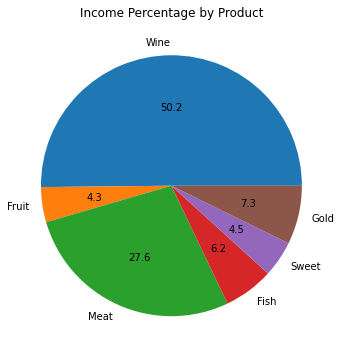

In [78]:
plt.figure(figsize=(6,6))

plt.pie(
    x= prod_prop['%'],
    labels= prod_prop['Product'],
    autopct=f'%.1f'
)
plt.title('Income Percentage by Product')
plt.show();

Insight :
- Pendapatan terbesar diperoleh melalui produk Wine dan Meat
- Pendapatan terkecil diperoleh melalui produk Fruit dan Sweet

In [79]:
plat_prop = pd.DataFrame((df[['Web','Store','Catalog']].sum()/df[['Web','Store','Catalog']]
.sum().sum()*100).round(2)).reset_index().rename(columns = {0 : '%', 'index':'Platform'})
plat_prop

Platform      %
0      Web  32.58
1    Store  46.18
2  Catalog  21.23

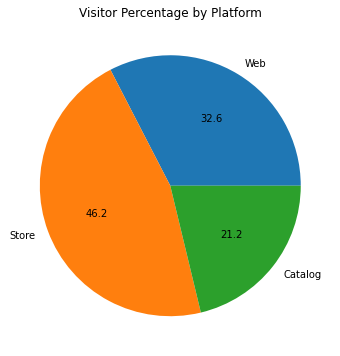

In [80]:
plt.figure(figsize=(6,6))

plt.pie(
    x= plat_prop['%'],
    labels= plat_prop['Platform'],
    autopct=f'%.1f'
)
plt.title('Visitor Percentage by Platform')
plt.show();

Insight :
- Platform yang paling banyak digunakan untuk berbelanja adalah Store.
- Platform yang paling sedikit digunakan untuk berbelanja adalah Catalog.

In [81]:
ms_prop = pd.DataFrame((df.groupby('Marital_Status').sum()[['Wine','Fruit','Meat','Fish','Sweet','Gold']].T.sum()/
df.groupby('Marital_Status').sum()[['Wine','Fruit','Meat','Fish','Sweet','Gold']].T.sum().sum()*100).round(2)).rename(columns={0 : 'Total Penjualan'}).reset_index()
ms_prop

Marital_Status  Total Penjualan
0         Single            36.38
1       Together            63.62

In [82]:
rata2_pengeluaran_by_marital_status = df[['Marital_Status','Total_Expenses']].groupby('Marital_Status').mean().reset_index()
rata2_pengeluaran_by_marital_status

Marital_Status  Total_Expenses
0         Single      620.188442
1       Together      597.865651

In [83]:
rata2_berlangganan_by_marital_status = df[['Marital_Status','Days_From_Join']].groupby('Marital_Status').mean().reset_index()
rata2_berlangganan_by_marital_status

Marital_Status  Days_From_Join
0         Single      565.840452
1       Together      569.257618

In [84]:
jumlah_pengeluaran_by_marital_status = df[['Marital_Status','Total_Expenses']].groupby('Marital_Status').sum().reset_index()
jumlah_pengeluaran_by_marital_status

Marital_Status  Total_Expenses
0         Single          493670
1       Together          863318

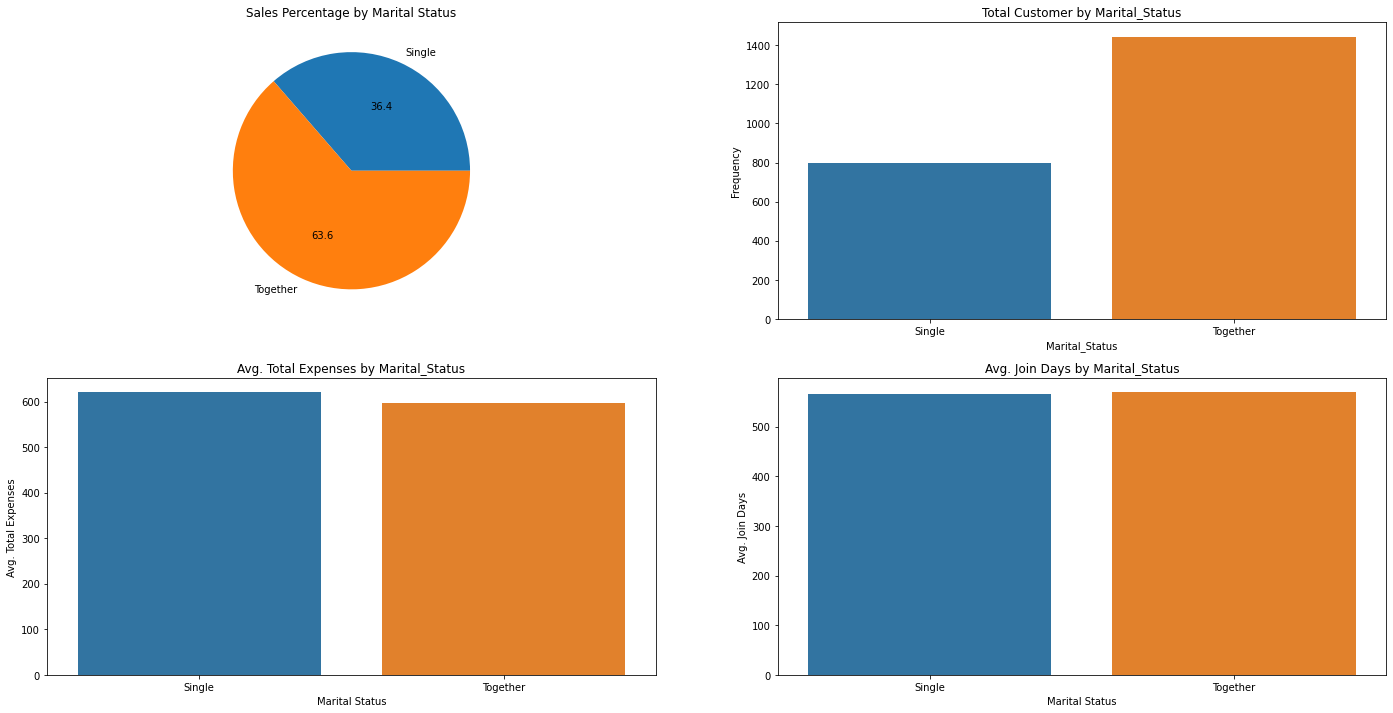

In [85]:
plt.figure(figsize=(24,12))

# Sales Percentage
plt.subplot (2,2,1)
plt.pie(
    x= ms_prop['Total Penjualan'],
    labels= ms_prop['Marital_Status'],
    autopct=f'%.1f')
plt.title('Sales Percentage by Marital Status')

# Total Customer
plt.subplot (2,2,2)
sns.countplot(data = df, x = 'Marital_Status')
plt.title('Total Customer by Marital_Status')
plt.ylabel('Frequency')
plt.xlabel('Marital_Status')

# Total Customer
plt.subplot (2,2,3)
sns.barplot(data = rata2_pengeluaran_by_marital_status, x = 'Marital_Status', y = 'Total_Expenses')
plt.title('Avg. Total Expenses by Marital_Status')
plt.ylabel('Avg. Total Expenses')
plt.xlabel('Marital Status')

# Total Customer
plt.subplot (2,2,4)
sns.barplot(data = rata2_berlangganan_by_marital_status, x = 'Marital_Status', y = 'Days_From_Join')
plt.title('Avg. Join Days by Marital_Status')
plt.ylabel('Avg. Join Days')
plt.xlabel('Marital Status')

plt.show();

Insight :
- Pendapatan perusahaan paling banyak didapatkan dari pembelian konsumen dengan status perkawinan Together.
- Namun, rata-rata total expenses tertinggi berada pada konsumen dengan status perkawinan Single.
- Rata-rata lamanya konsumen dari kelompok Together dan Single bergabung tidak berbeda signifikan.
- Jika dilihat dari jumlahnya, jumlah konsumen dengan status perkawinan Together memiliki hampir dua kali dari jumlah konsumen dengan status perkawinan Single. Maka dari itu sangat wajar dengan rata-rata total_expenses dan lama bergabung yang tidak berbeda jauh, namun kuantitasnya berbeda jauh menyebabkan konsumen dengan status perkawinan Together berkontribusi lebih besar dalam pendapatan perusahaan.

Setelah mendapatkan gambaran singkat mengenai bisnis kita, selanjutnya kita akan menganalisa setiap variabel untuk mendapatkan gambaran mengenai konsumen kita.

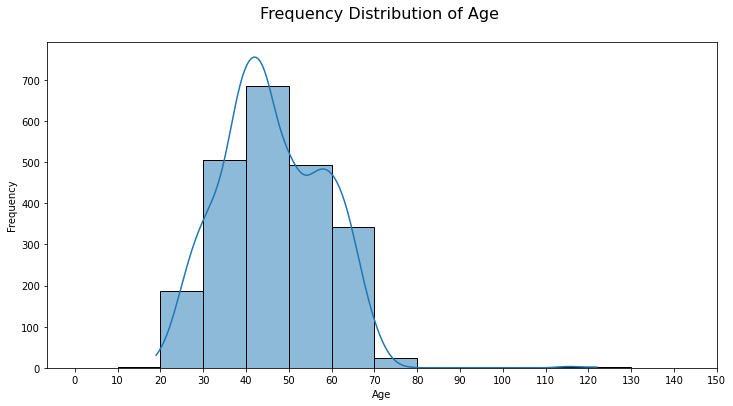

In [86]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Age', binrange=(0,130), bins=13, kde=True)

plt.title('Frequency Distribution of Age \n', size=16)
plt.xticks(ticks=range(0,151,10))
plt.ylabel('Frequency')

plt.show();

Insight :
- Rata-rata umur kustomer berada pada rentang 40-50 tahun

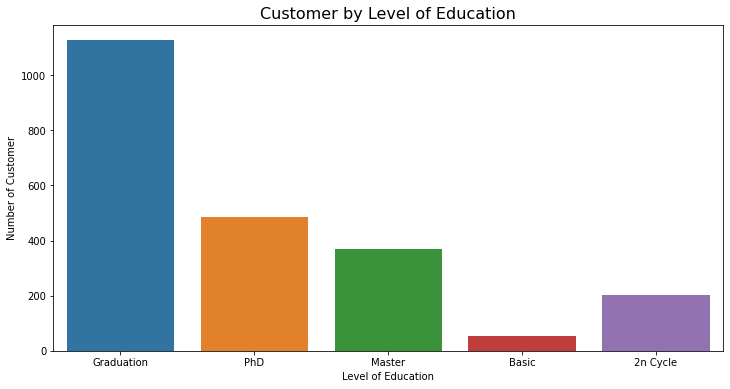

In [87]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Education')
plt.title('Customer by Level of Education', size=16)
plt.ylabel('Number of Customer')
plt.xlabel('Level of Education')

plt.show();

Insight :
- Jumlah kustomer tertinggi datang dari tingkat pendidikan Graduation.
- Jumlah kustomer terendah datang dari tingkat pendidikan Basic.

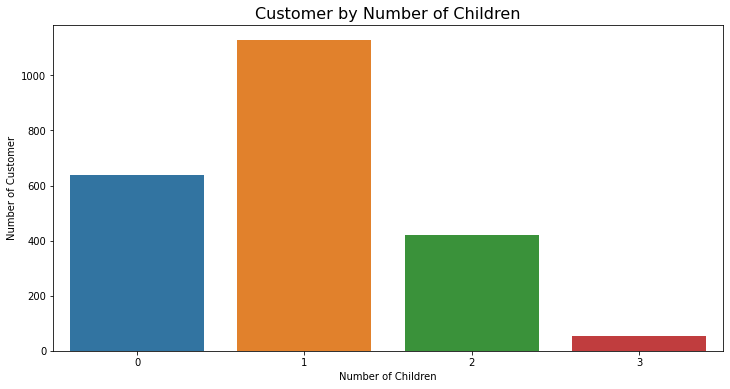

In [88]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Children')
plt.title('Customer by Number of Children', size=16)
plt.ylabel('Number of Customer')
plt.xlabel('Number of Children')

plt.show();

Insight :
- Jumlah konsumen tertinggi datang dari konsumen dengan jumlah anak 1.
- Jumlah konsumen terendah datang dari konsumen dengan jumlah anak 3.

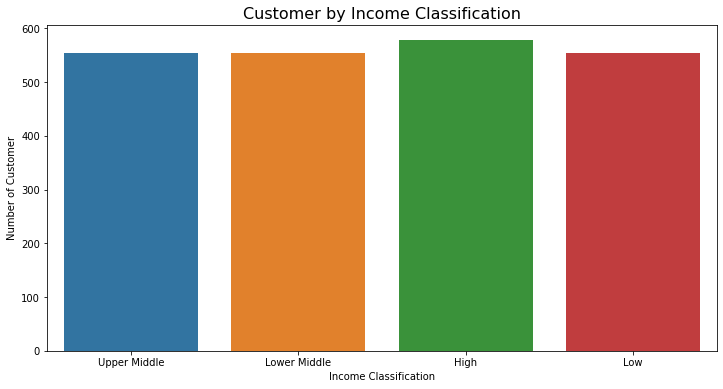

In [89]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Income_Classification')
plt.title('Customer by Income Classification', size=16)
plt.ylabel('Number of Customer')
plt.xlabel('Income Classification')

plt.show();

Insight :
- Jumlah konsumen tertinggi datang dari tingkat pendapatan High.
- Jumlah konsumen pada tingkat pendapatan lainnya hampir sama.

Setelah mengetahui gambaran bisnis perusahaan dan konsumennya, selanjutnya dilakukan analisa perilaku konsumen.<br>
Analisa dilakukan terhadap setiap variabel yang saling berhubungan.<br>
Hubungan antar variabel didapatkan melalui hasil uji statistik yang telah dilakukan sebelumnya.<br>
- Numerikal vs Numerikal :<br>
Hubungan antara dua variabel numerikal dilihat melalui hasil uji korelasi.<br>
Dua variabel dianggap memiliki hubungan yang berarti ketika nilai korelasinya >= 0.5.<br><br>
- Kategorikal vs Numerikal :<br>
Hubungan antara variabel numerikal dan katgerikal dilihat melalui hasil uji signifikansi antar kelompok variabel.<br>
Dua variabel dianggap memiliki hubungan ketika pvalue <= 0.05 (berhubungan).<br><br>
- Kategorikal vs Kategorikal : <br>
Hubungan antara dua variabel kategorikal dilihat melalui hasil uji keterkaitan antar kelompok variabel.<br>
Dua variabel dianggap memiliki keterkaitan (dependent) ketika pvalue <= 0.05.<br><br>


Pertama, kita akan mencari tahu terlebih dahulu karaketeristik konsumen untuk setiap produk.

Analisa hubungan variabel numerikal vs numerikal pada produk dan people

In [90]:
df_correlation.loc[['Wine','Fruit','Meat','Fish','Sweet','Gold','Total_Expenses'],['Age','Income','Days_From_Join','Recency']]

Age    Income  Days_From_Join   Recency
Wine            0.234200  0.830056        0.135817  0.018662
Fruit           0.025445  0.582379        0.120152  0.025295
Meat            0.112499  0.816815        0.143315  0.027822
Fish            0.030594  0.577392        0.135323  0.013305
Sweet          -0.003176  0.567087        0.113859  0.024196
Gold            0.076580  0.505550        0.215169  0.018376
Total_Expenses  0.156773  0.850920        0.168713  0.019927

Variabel yang berhubungan :

- Income : Wine, Fruit, Meat, Fish, Sweet, Gold, Total_Expenses

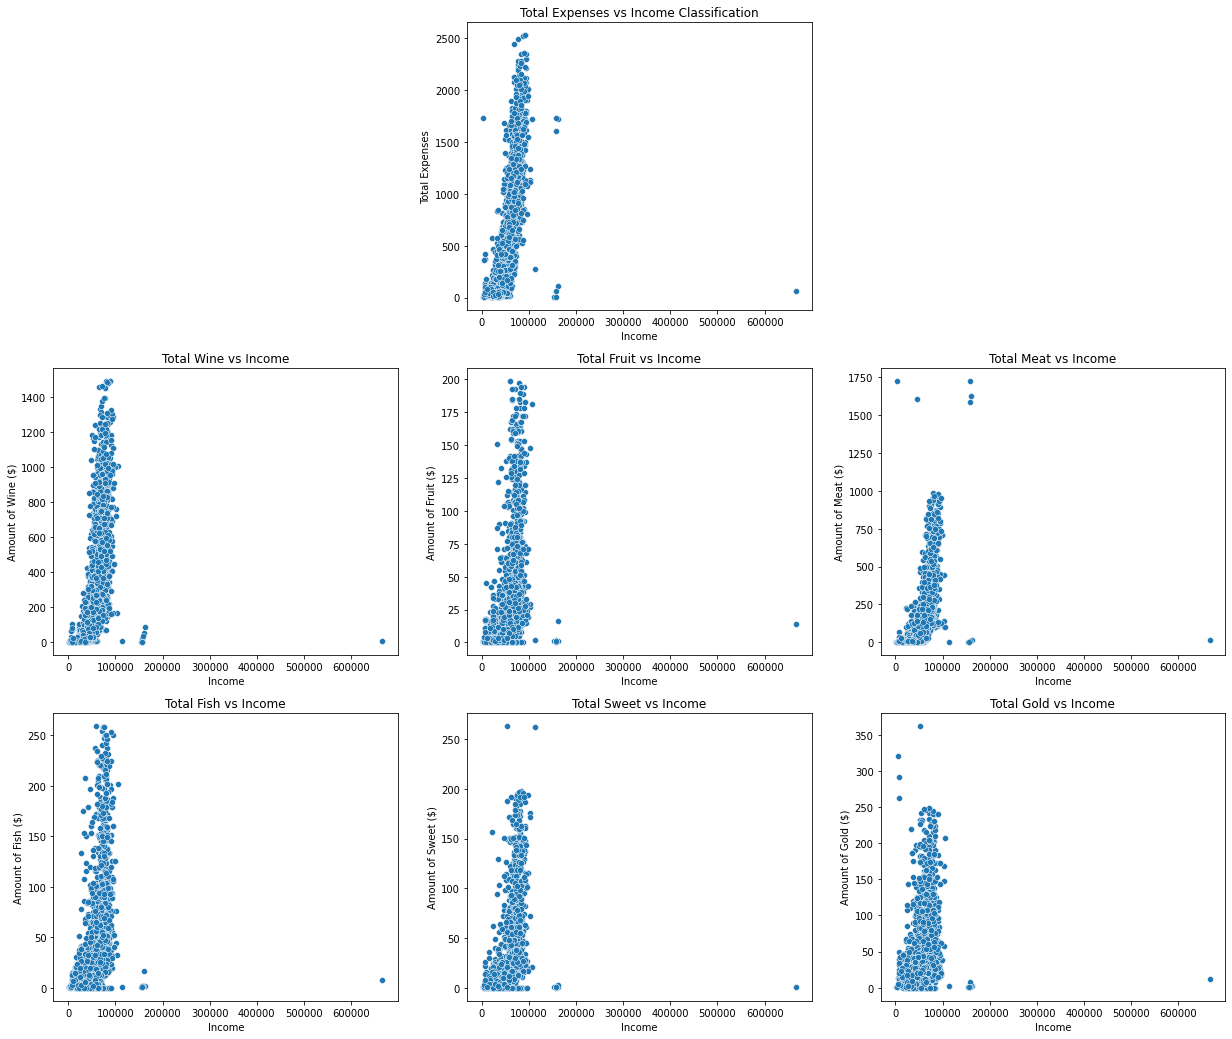

In [91]:
# Grafik Income_Classification : Wine, Fruit, Meat, Sweet, Gold, Total_Expenses 

plt.figure(figsize = (21,18))

# Income vs Total Expenses
plt.subplot (3,3,2)
sns.scatterplot(data = df, x = 'Income', y = 'Total_Expenses')
plt.title('Total Expenses vs Income Classification')
plt.ylabel('Total Expenses')
plt.xlabel('Income')

# Income vs Wine
plt.subplot (3,3,4)
sns.scatterplot(data = df, x = 'Income', y = 'Wine')
plt.title('Total Wine vs Income')
plt.ylabel('Amount of Wine ($)')
plt.xlabel('Income')

# Income vs Fruit
plt.subplot (3,3,5)
sns.scatterplot(data = df, x = 'Income', y = 'Fruit')
plt.title('Total Fruit vs Income')
plt.ylabel('Amount of Fruit ($)')
plt.xlabel('Income')

# Income vs Meat
plt.subplot (3,3,6)
sns.scatterplot(data = df, x = 'Income', y = 'Meat')
plt.title('Total Meat vs Income')
plt.ylabel('Amount of Meat ($)')
plt.xlabel('Income')

# Income vs Fish
plt.subplot (3,3,7)
sns.scatterplot(data = df, x = 'Income', y = 'Fish')
plt.title('Total Fish vs Income')
plt.ylabel('Amount of Fish ($)')
plt.xlabel('Income')

# Income vs Sweet
plt.subplot (3,3,8)
sns.scatterplot(data = df, x = 'Income', y = 'Sweet')
plt.title('Total Sweet vs Income')
plt.ylabel('Amount of Sweet ($)')
plt.xlabel('Income')

# Income vs Gold
plt.subplot (3,3,9)
sns.scatterplot(data = df, x = 'Income', y = 'Gold')
plt.title('Total Gold vs Income')
plt.ylabel('Amount of Gold ($)')
plt.xlabel('Income')

plt.show();

Insight :
- Grafik terlihat sangat curam, hal ini dapat disebabkan oleh outlier.

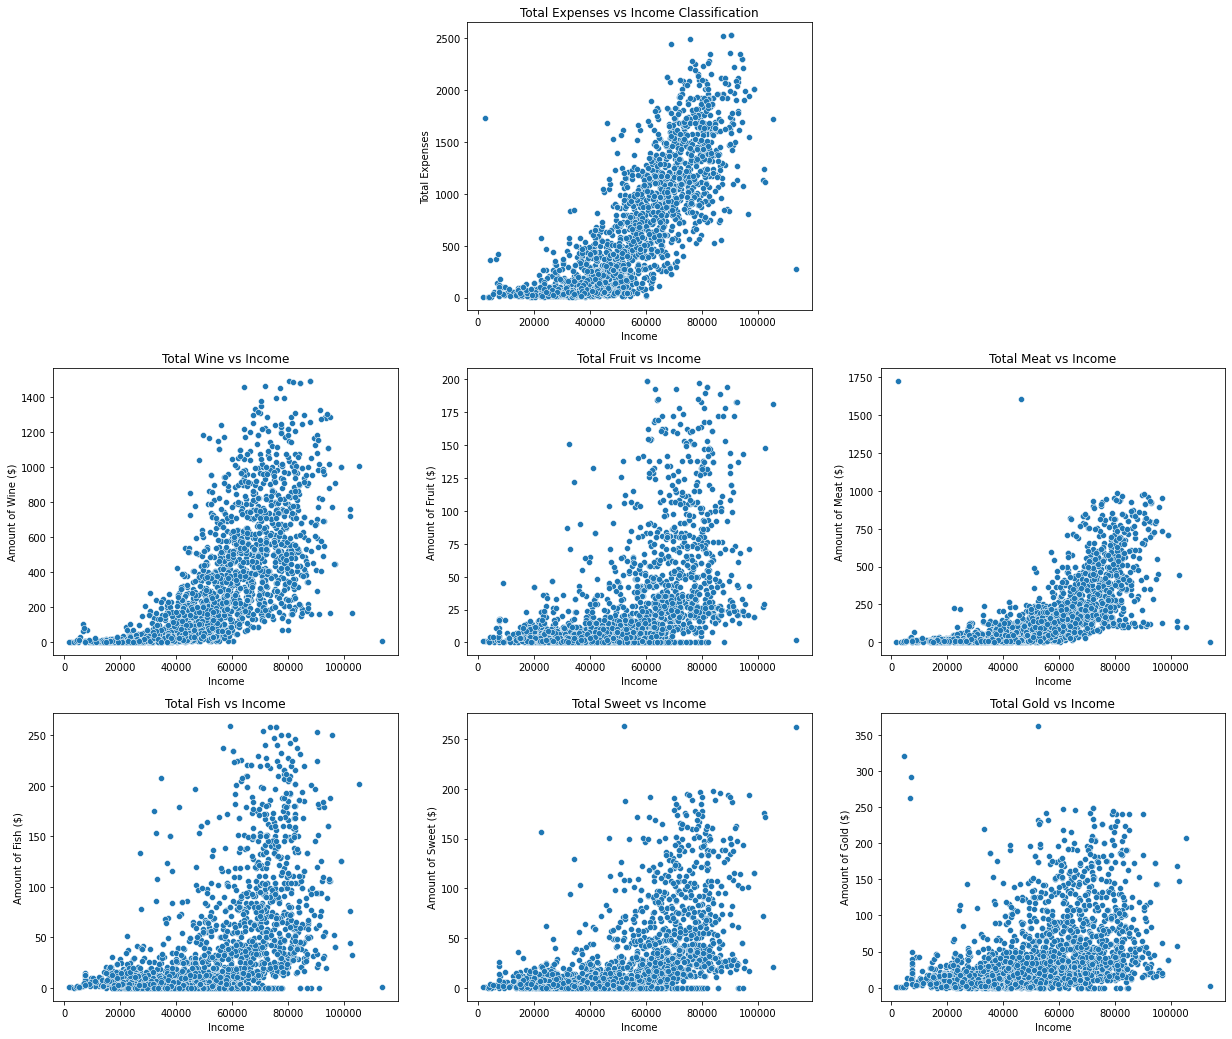

In [92]:
# Grafik Income_Classification : Wine, Fruit, Meat, Sweet, Gold, Total_Expenses 

plt.figure(figsize = (21,18))

# Income vs Total Expenses
plt.subplot (3,3,2)
sns.scatterplot(data = df[df['Income']<140000], x = 'Income', y = 'Total_Expenses')
plt.title('Total Expenses vs Income Classification')
plt.ylabel('Total Expenses')
plt.xlabel('Income')

# Income vs Wine
plt.subplot (3,3,4)
sns.scatterplot(data = df[df['Income']<140000], x = 'Income', y = 'Wine')
plt.title('Total Wine vs Income')
plt.ylabel('Amount of Wine ($)')
plt.xlabel('Income')

# Income vs Fruit
plt.subplot (3,3,5)
sns.scatterplot(data = df[df['Income']<140000], x = 'Income', y = 'Fruit')
plt.title('Total Fruit vs Income')
plt.ylabel('Amount of Fruit ($)')
plt.xlabel('Income')

# Income vs Meat
plt.subplot (3,3,6)
sns.scatterplot(data = df[df['Income']<140000], x = 'Income', y = 'Meat')
plt.title('Total Meat vs Income')
plt.ylabel('Amount of Meat ($)')
plt.xlabel('Income')

# Income vs Fish
plt.subplot (3,3,7)
sns.scatterplot(data = df[df['Income']<140000], x = 'Income', y = 'Fish')
plt.title('Total Fish vs Income')
plt.ylabel('Amount of Fish ($)')
plt.xlabel('Income')

# Income vs Sweet
plt.subplot (3,3,8)
sns.scatterplot(data = df[df['Income']<140000], x = 'Income', y = 'Sweet')
plt.title('Total Sweet vs Income')
plt.ylabel('Amount of Sweet ($)')
plt.xlabel('Income')

# Income vs Gold
plt.subplot (3,3,9)
sns.scatterplot(data = df[df['Income']<140000], x = 'Income', y = 'Gold')
plt.title('Total Gold vs Income')
plt.ylabel('Amount of Gold ($)')
plt.xlabel('Income')

plt.show();

Insight (Beberapa outlier disisihkan) :
- Income memiliki hubungan yang kuat dan positif terhadap total expenses, jumlah pengeluaran meat dan jumlah pengeluaran wine.
- Income memiliki hubungan yang moderate dan positif terhadap pengeluaran untuk seluruh produk kecuali meat dan wine, hal ini dapat dilihat dengan adanya trend naik namun data cukup tersebar.

Analisa hubungan variabel numerikal vs kategorikal pada produk dan people

In [93]:
df_hubungan_people.loc[['Wine','Fruit','Meat','Sweet','Gold','Total_Expenses']]

Education Marital_Status Income_Classification  \
Wine            Berhubungan    Berhubungan           Berhubungan   
Fruit           Berhubungan    Berhubungan           Berhubungan   
Meat            Berhubungan    Berhubungan           Berhubungan   
Sweet           Berhubungan    Berhubungan           Berhubungan   
Gold            Berhubungan    Berhubungan           Berhubungan   
Total_Expenses  Berhubungan    Berhubungan           Berhubungan   

                         Complain     Children  
Wine            Tidak Berhubungan  Berhubungan  
Fruit           Tidak Berhubungan  Berhubungan  
Meat            Tidak Berhubungan  Berhubungan  
Sweet           Tidak Berhubungan  Berhubungan  
Gold            Tidak Berhubungan  Berhubungan  
Total_Expenses  Tidak Berhubungan  Berhubungan

In [94]:
df_hubungan_product.loc[['Age','Income']]

Biggest_Allocation
Age           Berhubungan
Income        Berhubungan

Variabel yang berhubungan : 
- Education : Wine, Fruit, Meat, Sweet, Gold, Total_Expenses
- Marital Status : Wine, Fruit, Meat, Sweet, Gold, Total_Expenses
- Income_Classification : Wine, Fruit, Meat, Sweet, Gold, Total_Expenses
- Children : Wine, Fruit, Meat, Sweet, Gold, Total_Expenses
- Biggest_Allocation : Age, Income

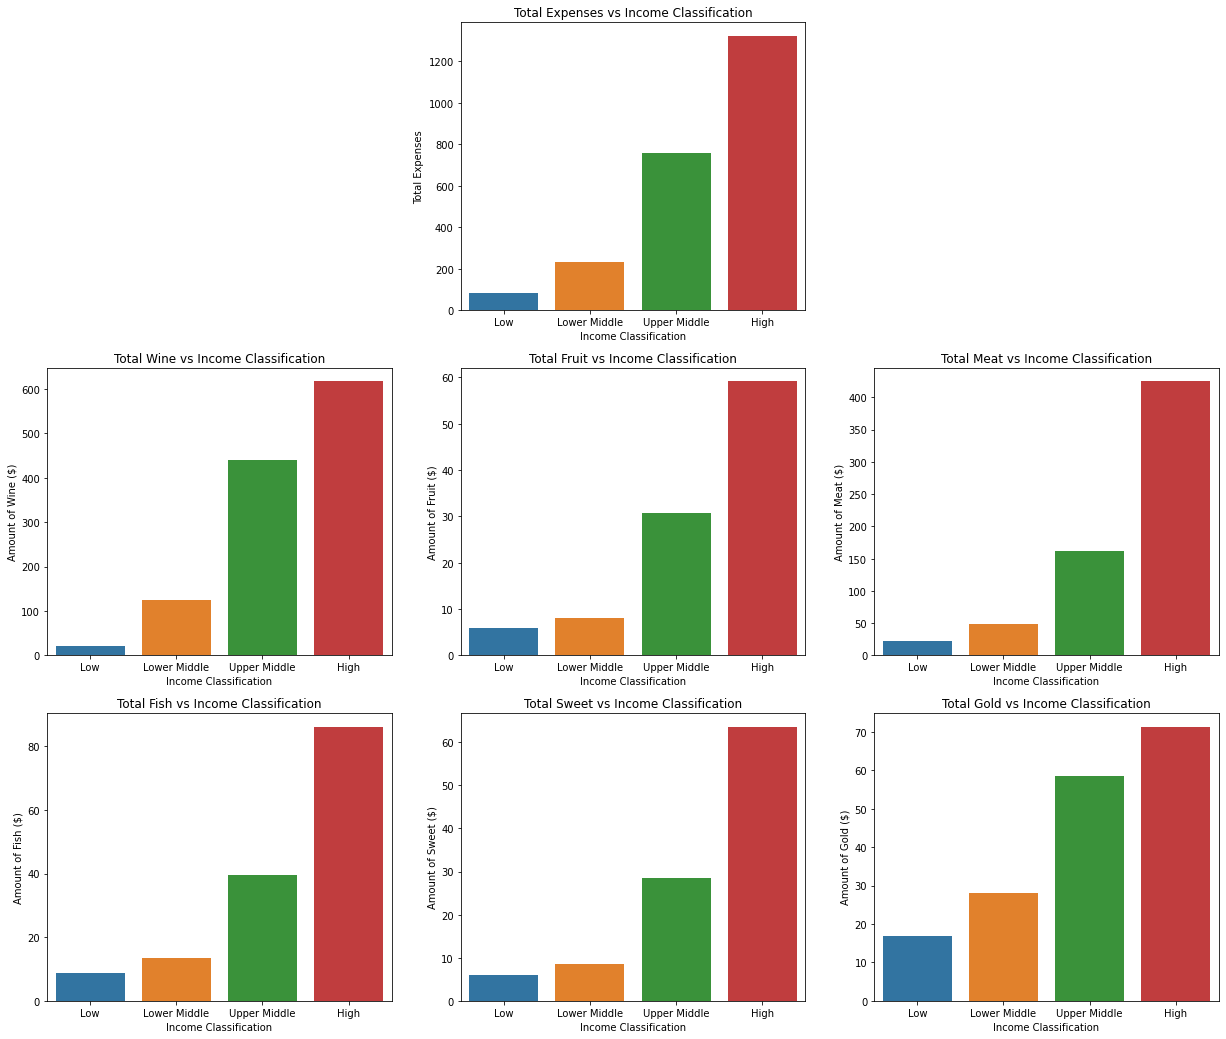

In [95]:
# Grafik Income_Classification : Wine, Fruit, Meat, Sweet, Gold, Total_Expenses 

plt.figure(figsize = (21,18))

# Income_Classification vs Total Expenses
plt.subplot (3,3,2)
sns.barplot(data = df, x = 'Income_Classification', y = 'Total_Expenses', order = ['Low', 'Lower Middle', 'Upper Middle', 'High'], ci= None)
plt.title('Total Expenses vs Income Classification')
plt.ylabel('Total Expenses')
plt.xlabel('Income Classification')

# Income_Classification vs Wine
plt.subplot (3,3,4)
sns.barplot(data = df, x = 'Income_Classification', y = 'Wine', order = ['Low', 'Lower Middle', 'Upper Middle', 'High'], ci= None)
plt.title('Total Wine vs Income Classification')
plt.ylabel('Amount of Wine ($)')
plt.xlabel('Income Classification')

# Income_Classification vs Fruit
plt.subplot (3,3,5)
sns.barplot(data = df, x = 'Income_Classification', y = 'Fruit', order = ['Low', 'Lower Middle', 'Upper Middle', 'High'], ci= None)
plt.title('Total Fruit vs Income Classification')
plt.ylabel('Amount of Fruit ($)')
plt.xlabel('Income Classification')

# Income_Classification vs Meat
plt.subplot (3,3,6)
sns.barplot(data = df, x = 'Income_Classification', y = 'Meat', order = ['Low', 'Lower Middle', 'Upper Middle', 'High'], ci= None)
plt.title('Total Meat vs Income Classification')
plt.ylabel('Amount of Meat ($)')
plt.xlabel('Income Classification')

# Income_Classification vs Fish
plt.subplot (3,3,7)
sns.barplot(data = df, x = 'Income_Classification', y = 'Fish', order = ['Low', 'Lower Middle', 'Upper Middle', 'High'], ci= None)
plt.title('Total Fish vs Income Classification')
plt.ylabel('Amount of Fish ($)')
plt.xlabel('Income Classification')

# Income_Classification vs Sweet
plt.subplot (3,3,8)
sns.barplot(data = df, x = 'Income_Classification', y = 'Sweet', order = ['Low', 'Lower Middle', 'Upper Middle', 'High'], ci= None)
plt.title('Total Sweet vs Income Classification')
plt.ylabel('Amount of Sweet ($)')
plt.xlabel('Income Classification')

# Income_Classification vs Gold
plt.subplot (3,3,9)
sns.barplot(data = df, x = 'Income_Classification', y = 'Gold', order = ['Low', 'Lower Middle', 'Upper Middle', 'High'], ci= None)
plt.title('Total Gold vs Income Classification')
plt.ylabel('Amount of Gold ($)')
plt.xlabel('Income Classification')

plt.show();

Insight :
- Konsumen dengan High Income memiliki rata-rata jumlah pengeluaran tertinggi disetiap produk yaitu Wine, Fruit, Meat, Fish, Sweet, dan Gold.<br>
- Konsumen dengan High Income memiliki rata-rata total expenses tertinggi.<br>

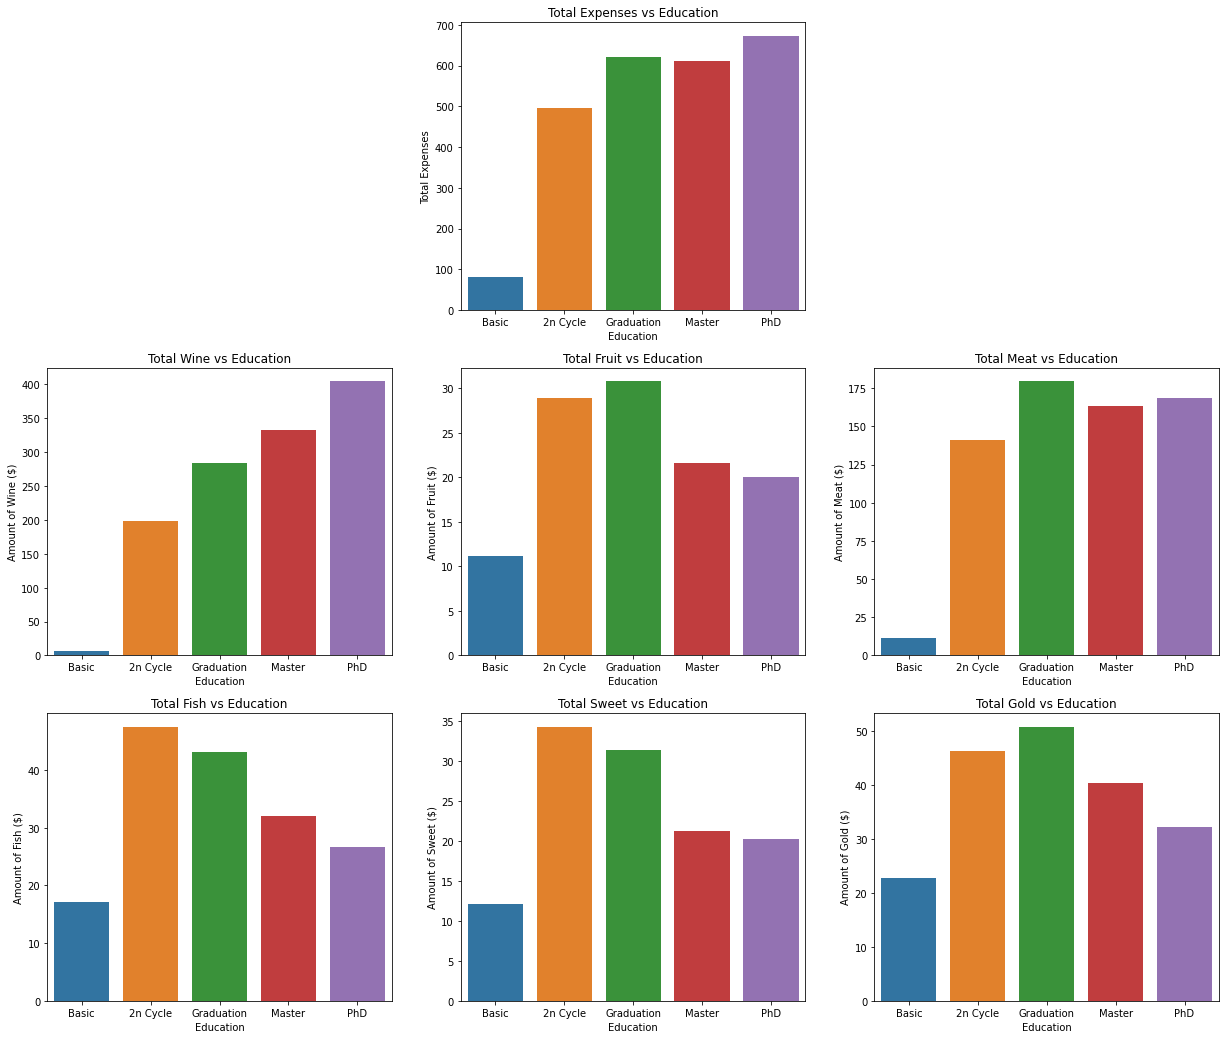

In [96]:
# Grafik Education : Wine, Fruit, Meat, Sweet, Gold, Total_Expenses 
plt.figure(figsize = (21,18))

# Total Expenses
plt.subplot (3,3,2)
sns.barplot(data = df, x = 'Education', y = 'Total_Expenses', order = ['Basic','2n Cycle', 'Graduation', 'Master', 'PhD'], ci= None)
plt.title('Total Expenses vs Education')
plt.ylabel('Total Expenses')
plt.xlabel('Education')

# wine
plt.subplot (3,3,4)
sns.barplot(data = df, x = 'Education', y = 'Wine', order = ['Basic','2n Cycle', 'Graduation', 'Master', 'PhD'], ci= None)
plt.title('Total Wine vs Education')
plt.ylabel('Amount of Wine ($)')
plt.xlabel('Education')

# Fruit
plt.subplot (3,3,5)
sns.barplot(data = df, x = 'Education', y = 'Fruit', order = ['Basic','2n Cycle', 'Graduation', 'Master', 'PhD'], ci= None)
plt.title('Total Fruit vs Education')
plt.ylabel('Amount of Fruit ($)')
plt.xlabel('Education')

# Meat
plt.subplot (3,3,6)
sns.barplot(data = df, x = 'Education', y = 'Meat', order = ['Basic','2n Cycle', 'Graduation', 'Master', 'PhD'], ci= None)
plt.title('Total Meat vs Education')
plt.ylabel('Amount of Meat ($)')
plt.xlabel('Education')

# Fish
plt.subplot (3,3,7)
sns.barplot(data = df, x = 'Education', y = 'Fish', order = ['Basic','2n Cycle', 'Graduation', 'Master', 'PhD'], ci= None)
plt.title('Total Fish vs Education')
plt.ylabel('Amount of Fish ($)')
plt.xlabel('Education')

# Sweet
plt.subplot (3,3,8)
sns.barplot(data = df, x = 'Education', y = 'Sweet', order = ['Basic','2n Cycle', 'Graduation', 'Master', 'PhD'], ci= None)
plt.title('Total Sweet vs Education')
plt.ylabel('Amount of Sweet ($)')
plt.xlabel('Education')

# Gold
plt.subplot (3,3,9)
sns.barplot(data = df, x = 'Education', y = 'Gold', order = ['Basic','2n Cycle', 'Graduation', 'Master', 'PhD'], ci= None)
plt.title('Total Gold vs Education')
plt.ylabel('Amount of Gold ($)')
plt.xlabel('Education')

plt.show();

Insight :
- Konsumen dengan tingkat pendidikan PhD memiliki rata-rata total expenses tertinggi dan rata-rata jumlah pengeluaran tertinggi pada produk Wine.<br>
- Konsumen dengan tingkat pendidikan Graduation memiliki rata-rata jumlah pengeluaran tertinggi pada produk Fruit, Meat, dan Gold.<br>
- Konsumen dengan tingkat pendidikan 2n Cycle memiliki rata-rata jumlah pengeluaran tertinggi pada produk Fish dan Sweet.<br>
- Konsumen dengan tingkat pendidikan Basic memiliki rata-rata total expenses terendah dan rata-rata jumlah pengeluaran terendah pada setiap produk.<br>

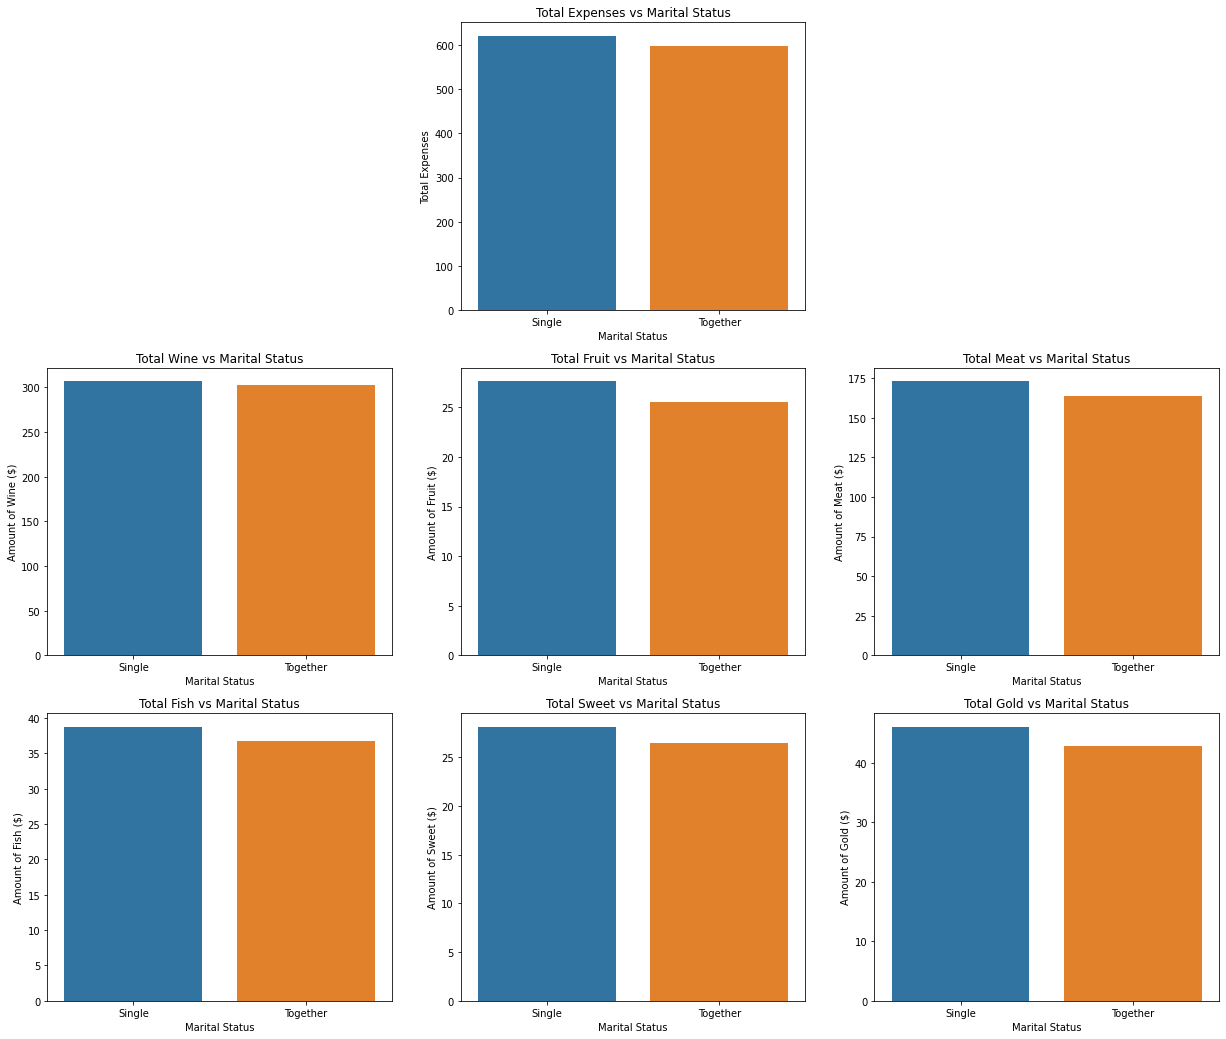

In [97]:
# Grafik Marital Status : Wine, Fruit, Meat, Sweet, Gold, Total_Expenses 
plt.figure(figsize = (21,18))

# Total Expenses
plt.subplot (3,3,2)
sns.barplot(data = df, x = 'Marital_Status', y = 'Total_Expenses', order = ['Single', 'Together'], ci= None)
plt.title('Total Expenses vs Marital Status')
plt.ylabel('Total Expenses')
plt.xlabel('Marital Status')

# wine
plt.subplot (3,3,4)
sns.barplot(data = df, x = 'Marital_Status', y = 'Wine', order = ['Single', 'Together'], ci= None)
plt.title('Total Wine vs Marital Status')
plt.ylabel('Amount of Wine ($)')
plt.xlabel('Marital Status')

# Fruit
plt.subplot (3,3,5)
sns.barplot(data = df, x = 'Marital_Status', y = 'Fruit', order = ['Single', 'Together'], ci= None)
plt.title('Total Fruit vs Marital Status')
plt.ylabel('Amount of Fruit ($)')
plt.xlabel('Marital Status')

# Meat
plt.subplot (3,3,6)
sns.barplot(data = df, x = 'Marital_Status', y = 'Meat', order = ['Single', 'Together'], ci= None)
plt.title('Total Meat vs Marital Status')
plt.ylabel('Amount of Meat ($)')
plt.xlabel('Marital Status')

# Fish
plt.subplot (3,3,7)
sns.barplot(data = df, x = 'Marital_Status', y = 'Fish', order = ['Single', 'Together'], ci= None)
plt.title('Total Fish vs Marital Status')
plt.ylabel('Amount of Fish ($)')
plt.xlabel('Marital Status')

# Sweet
plt.subplot (3,3,8)
sns.barplot(data = df, x = 'Marital_Status', y = 'Sweet', order = ['Single', 'Together'], ci= None)
plt.title('Total Sweet vs Marital Status')
plt.ylabel('Amount of Sweet ($)')
plt.xlabel('Marital Status')

# Gold
plt.subplot (3,3,9)
sns.barplot(data = df, x = 'Marital_Status', y = 'Gold', order = ['Single', 'Together'], ci= None)
plt.title('Total Gold vs Marital Status')
plt.ylabel('Amount of Gold ($)')
plt.xlabel('Marital Status')

plt.show();


Insight :
- Konsumen dengan Marital Status 'Single' memiliki rata-rata jumlah pengeluaran tertinggi pada setiap produk.<br>
- Konsumen dengan Marital Status 'Single' memiliki rata-rata total expenses tertinggi.<br>

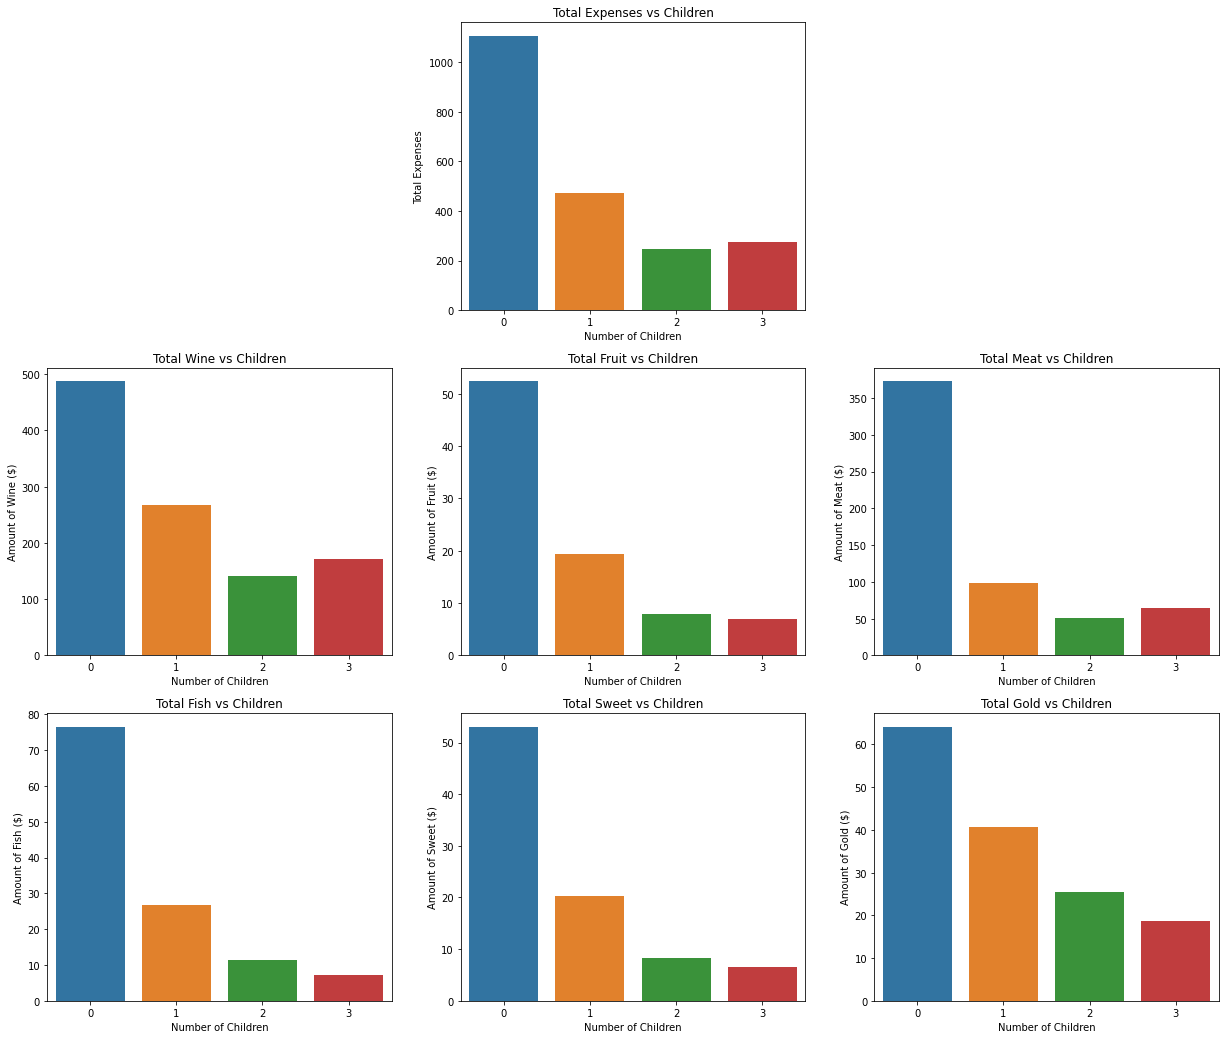

In [98]:
# Grafik Children : Wine, Fruit, Meat, Sweet, Gold, Total_Expenses 
plt.figure(figsize = (21,18))

# Total Expenses
plt.subplot (3,3,2)
sns.barplot(data = df, x = 'Children', y = 'Total_Expenses', order = [0,1,2,3], ci= None)
plt.title('Total Expenses vs Children')
plt.ylabel('Total Expenses')
plt.xlabel('Number of Children')

# wine
plt.subplot (3,3,4)
sns.barplot(data = df, x = 'Children', y = 'Wine', order = [0,1,2,3], ci= None)
plt.title('Total Wine vs Children')
plt.ylabel('Amount of Wine ($)')
plt.xlabel('Number of Children')

# Fruit
plt.subplot (3,3,5)
sns.barplot(data = df, x = 'Children', y = 'Fruit', order = [0,1,2,3], ci= None)
plt.title('Total Fruit vs Children')
plt.ylabel('Amount of Fruit ($)')
plt.xlabel('Number of Children')

# Meat
plt.subplot (3,3,6)
sns.barplot(data = df, x = 'Children', y = 'Meat', order = [0,1,2,3], ci= None)
plt.title('Total Meat vs Children')
plt.ylabel('Amount of Meat ($)')
plt.xlabel('Number of Children')

# Fish
plt.subplot (3,3,7)
sns.barplot(data = df, x = 'Children', y = 'Fish', order = [0,1,2,3], ci= None)
plt.title('Total Fish vs Children')
plt.ylabel('Amount of Fish ($)')
plt.xlabel('Number of Children')

# Sweet
plt.subplot (3,3,8)
sns.barplot(data = df, x = 'Children', y = 'Sweet', order = [0,1,2,3], ci= None)
plt.title('Total Sweet vs Children')
plt.ylabel('Amount of Sweet ($)')
plt.xlabel('Number of Children')

# Gold
plt.subplot (3,3,9)
sns.barplot(data = df, x = 'Children', y = 'Gold', order = [0,1,2,3], ci= None)
plt.title('Total Gold vs Children')
plt.ylabel('Amount of Gold ($)')
plt.xlabel('Number of Children')

plt.show();

Insight :
- Konsumen dengan yang tidak memiliki anak memiliki rata-rata total expenses tertinggi dan rata-rata jumlah pengeluaran tertinggi pada setiap produk.<br>
- Konsumen dengan jumlah anak 2 memiliki rata-rata total expenses terendah dan rata-rata jumlah pengeluaran terendah pada produk Wine dan Meat.<br>
- Konsumen dengan jumlah anak 3 memiliki rata-rata jumlah pengeluaran terendah pada produk Fruit, Fish, Sweet, dan Gold.<br>

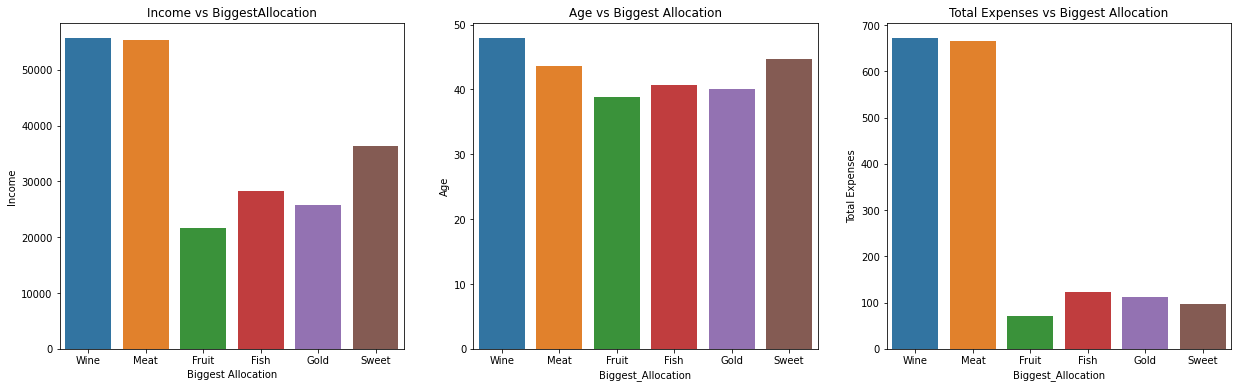

In [99]:
# Biggest Allocation : Income, Age and Total Expenses
plt.figure(figsize = (21,6))

# Income
plt.subplot (1,3,1)
sns.barplot(data = df, x = 'Biggest_Allocation', y = 'Income', ci= None)
plt.title('Income vs BiggestAllocation')
plt.ylabel('Income')
plt.xlabel('Biggest Allocation')

# Age
plt.subplot (1,3,2)
sns.barplot(data = df, x = 'Biggest_Allocation', y = 'Age', ci= None)
plt.title('Age vs Biggest Allocation')
plt.ylabel('Age')
plt.xlabel('Biggest_Allocation')

# Total Expenses
plt.subplot (1,3,3)
sns.barplot(data = df, x = 'Biggest_Allocation', y = 'Total_Expenses', ci= None)
plt.title('Total Expenses vs Biggest Allocation')
plt.ylabel('Total Expenses')
plt.xlabel('Biggest_Allocation')

plt.show();

Insight :
- Konsumen dengan rata-rata income yang tinggi cenderung mengalokasikan banyak pengeluaran pada produk Wine dan Meat.
- Konsumen dengan rata-rata umur yang tinggi cenderung mengalokasikan banyak pengeluaran pada produk Wine, Meat dan Sweet.
- Konsumen dengan rata-rata total_expenses tertinggi cenderung mengalokasikan banyak pengeluaran pada produk Wine dan Meat.
- Konsumen yang mengalokasikan banyak pengeluaran pada produk Fruit cenderung memiliki rata-rata income yang rendah.
- Konsumen yang mengalokasikan banyak pengeluaran pada produk Wine dan Meat cenderung memiliki rata-rata income yang tinggi.
- Konsumen dengan rata-rata total_expenses terendah cenderung mengalokasikan banyak pengeluaran pada produk Fruit.


Analisa hubungan variabel kategorikal vs kategorikal pada produk dan people

In [100]:
Hub_Kategorikal

Faktor_1                 Faktor_2   Hubungan
0                 Education    Income_Classification  Dependent
1                 Education       Biggest_Allocation  Dependent
2                 Education                 Response  Dependent
3            Marital_Status                 Children  Dependent
4            Marital_Status                 Response  Dependent
5     Income_Classification                 Children  Dependent
6     Income_Classification       Biggest_Allocation  Dependent
7     Income_Classification  Total_Accepted_Campaign  Dependent
8     Income_Classification                 Response  Dependent
9     Income_Classification          Frequently_Used  Dependent
10                 Complain       Biggest_Allocation  Dependent
11                 Children       Biggest_Allocation  Dependent
12                 Children  Total_Accepted_Campaign  Dependent
13                 Children                 Response  Dependent
14                 Children          Frequently_Used  Dependent
15       Biggest_Allocation  Total_Accepted_Campaign  Dependent
16       Biggest_Allocation                 Response  Dependent
17       Biggest_Allocation          Frequently_Used  Dependent
18  Total_Accepted_Campaign                 Response  Dependent
19  Total_Accepted_Campaign          Frequently_Used  Dependent
20                 Response          Frequently_Used  Dependent

Variabel yang berhubungan : 
- Bigest Allocation : Education, Income Classification, Complain, Children

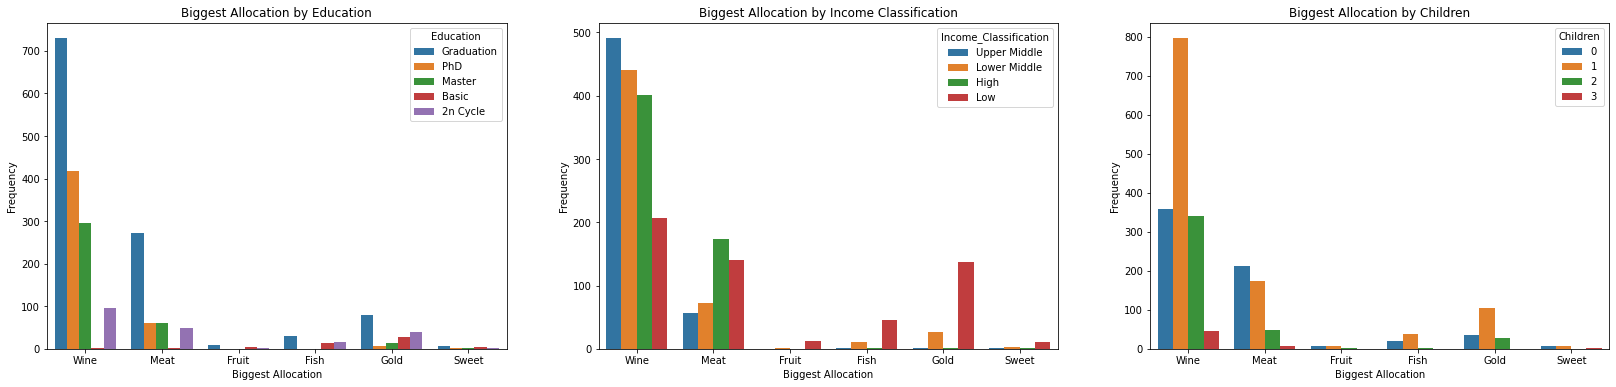

In [101]:
# Grafik Biggest Allocation : Education, Income Classification, Children 
plt.figure(figsize = (28,6))

# Education
plt.subplot (1,3,1)
sns.countplot(data = df, x = 'Biggest_Allocation', hue = 'Education')
plt.title('Biggest Allocation by Education')
plt.ylabel('Frequency')
plt.xlabel('Biggest Allocation')

# Income Classification
plt.subplot (1,3,2)
sns.countplot(data = df, x = 'Biggest_Allocation', hue = 'Income_Classification')
plt.title('Biggest Allocation by Income Classification')
plt.ylabel('Frequency')
plt.xlabel('Biggest Allocation')

# Children
plt.subplot (1,3,3)
sns.countplot(data = df, x = 'Biggest_Allocation', hue = 'Children')
plt.title('Biggest Allocation by Children')
plt.ylabel('Frequency')
plt.xlabel('Biggest Allocation')

plt.show();



Insight : <br><br>
Biggest Allocation by Education
- Dari segi proporsi, Konsumen dengan Tingkat Pendidikan Graduation, PhD, Master, dan 2n Cycle paling banyak mengalokasikan uang belanjanya pada Produk Wine, Meat dan Gold.
- Dari segi proporsi, Konsumen dengan Tingkat Pendidikan Basic paling banyak mengalokasikan uang belanjanya pada Produk Gold, Fish, dan Sweet
<br><br>

Biggest Allocation by Income Classification
- Dari segi proporsi, Konsumen dengan klasifikasi income High, Upper Middle, dan Lower Middle mengalokasikan uang belanjanya paling banyak pada Produk Wine dan Meat.
- Dari segi proporsi, Konsumen dengan klasifikasi income Low mengalokasikan uang belanjanya paling banyak pada Produk Wine, Meat dan Gold.
<br><br>

Biggest Allocation by Children
- Dari segi proporsi, Konsumen yang tidak memiliki anak, memiliki anak 1, dan memiliki anak 2 paling banyak mengalokasikan uang belanjanya pada Produk Wine, Meat dan Gold.
- Dari segi proporsi, Konsumen yang memiliki anak 3 paling banyak mengalokasikan uang belanjanya pada Produk Wine dan Meat.
<br><br>

Dengan mengetahui karakteristik dari konsumen, maka selanjutnya kita bisa mencari tahu platform apa yang paling sering digunakan oleh setiap karakteristik konsumen.

In [102]:
df.head()

ID  Age   Education Marital_Status  Children   Income  \
0  5524   58  Graduation         Single         0  58138.0   
1  2174   61  Graduation         Single         2  46344.0   
2  4141   50  Graduation       Together         0  71613.0   
3  6182   31  Graduation       Together         1  26646.0   
4  5324   34         PhD       Together         1  58293.0   

  Income_Classification  Days_From_Join  Recency  Complain  Wine  Fruit  Meat  \
0          Upper Middle            1027       58         0   635     88   546   
1          Lower Middle             181       38         0    11      1     6   
2                  High             528       26         0   426     49   127   
3                   Low             121       26         0    11      4    20   
4          Upper Middle             377       94         0   173     43   118   

   Fish  Sweet  Gold Biggest_Allocation  Total_Expenses  Cmp_1  Cmp_2  Cmp_3  \
0   172     88    88               Wine            1617      0      0      0   
1     2      1     6               Wine              27      0      0      0   
2   111     21    42               Wine             776      0      0      0   
3    10      3     5               Meat              53      0      0      0   
4    46     27    15               Wine             422      0      0      0   

   Cmp_4  Cmp_5  Total_Accepted_Campaign  Response  Deals_Purchases  Web  \
0      0      0                        0         1                3    8   
1      0      0                        0         0                2    1   
2      0      0                        0         0                1    8   
3      0      0                        0         0                2    2   
4      0      0                        0         0                5    5   

   Catalog  Store  Shopping_Amount Frequently_Used  Web_Visit_Month  
0       10      4               22         Catalog                7  
1        1      2                4           Store                5  
2        2     10               20           Store                4  
3        0      4                6           Store                6  
4        3      6               14           Store                5

In [103]:
df_hubungan_place.loc[['Age','Income']]

Frequently_Used
Age        Berhubungan
Income     Berhubungan

Variabel yang berhubungan : 
- Frequently Used : Age, Income

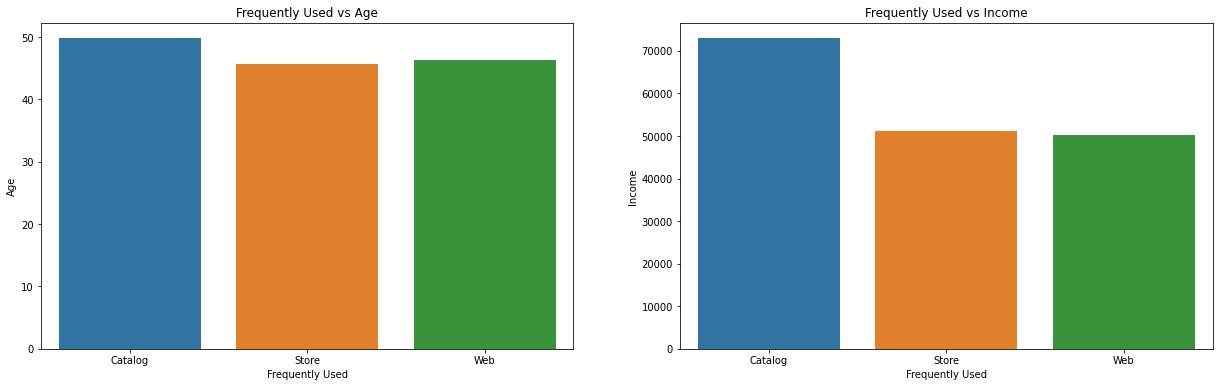

In [104]:
# Grafik Frequently Used : Age, Income

plt.figure(figsize = (21,6))

# Frequently Used vs Age
plt.subplot (1,2,1)
sns.barplot(data = df, x = 'Frequently_Used', y = 'Age', ci= None)
plt.title('Frequently Used vs Age')
plt.ylabel('Age')
plt.xlabel('Frequently Used')

# Frequently Used vs Income
plt.subplot (1,2,2)
sns.barplot(data = df, x = 'Frequently_Used', y = 'Income', ci= None)
plt.title('Frequently Used vs Income')
plt.ylabel('Income')
plt.xlabel('Frequently Used')

plt.show();

Insight : <br><br>
- Konsumen yang berbelanja melalui Catalog memiliki rata-rata umur dan income tertinggi (45 - 50 y/o, >70k ).
- Konsumen yang berbelanja melalui Store dan Web memiliki rata-rata umur antara 40 -50 y/o dan rata-rata income antara 50k - 55k.

In [105]:
Hub_Kategorikal

Faktor_1                 Faktor_2   Hubungan
0                 Education    Income_Classification  Dependent
1                 Education       Biggest_Allocation  Dependent
2                 Education                 Response  Dependent
3            Marital_Status                 Children  Dependent
4            Marital_Status                 Response  Dependent
5     Income_Classification                 Children  Dependent
6     Income_Classification       Biggest_Allocation  Dependent
7     Income_Classification  Total_Accepted_Campaign  Dependent
8     Income_Classification                 Response  Dependent
9     Income_Classification          Frequently_Used  Dependent
10                 Complain       Biggest_Allocation  Dependent
11                 Children       Biggest_Allocation  Dependent
12                 Children  Total_Accepted_Campaign  Dependent
13                 Children                 Response  Dependent
14                 Children          Frequently_Used  Dependent
15       Biggest_Allocation  Total_Accepted_Campaign  Dependent
16       Biggest_Allocation                 Response  Dependent
17       Biggest_Allocation          Frequently_Used  Dependent
18  Total_Accepted_Campaign                 Response  Dependent
19  Total_Accepted_Campaign          Frequently_Used  Dependent
20                 Response          Frequently_Used  Dependent

Variabel yang berhubungan : 
- Frequently Used : Education, Income Classification, Children, Biggest Allocation, Total Accepted Campaign, Response

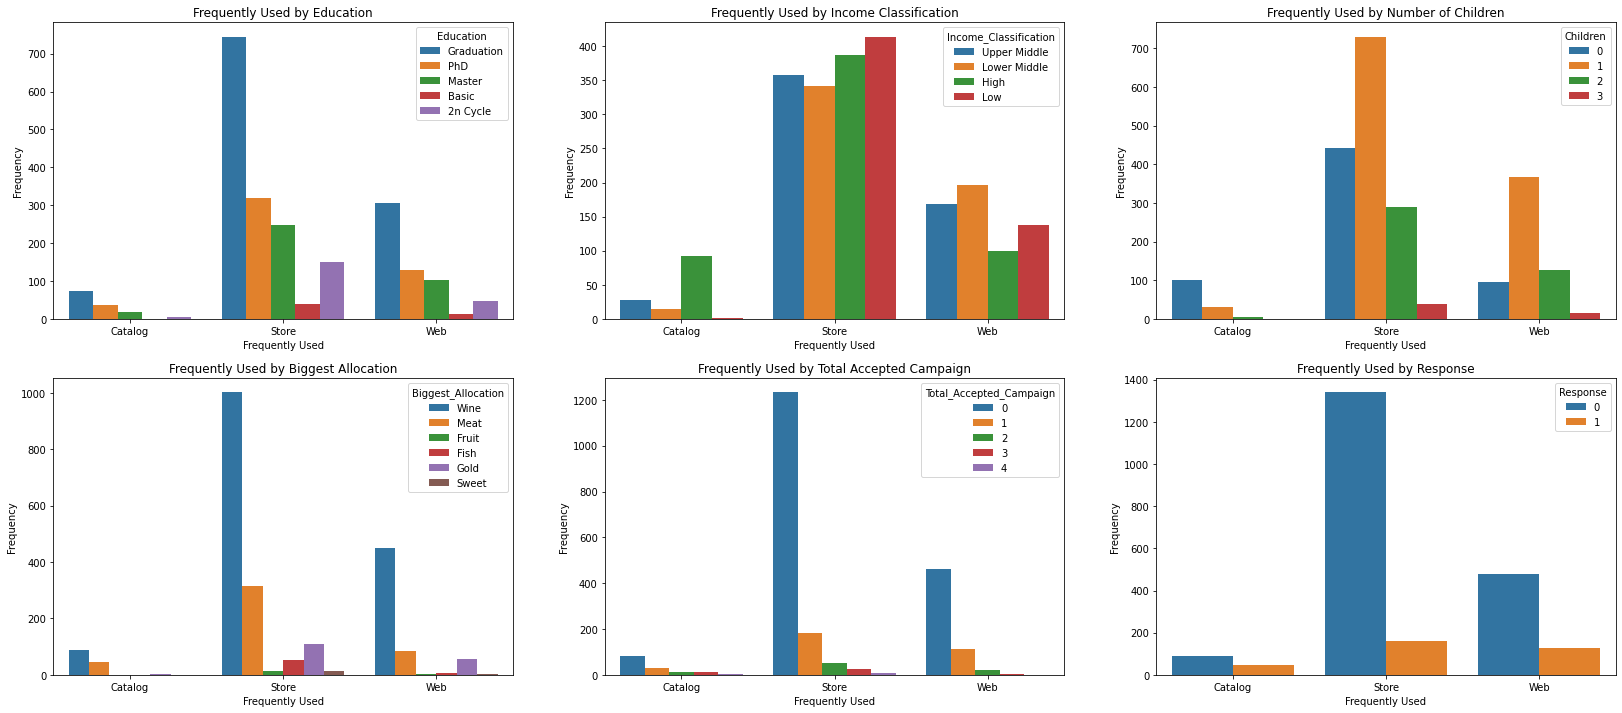

In [106]:
# Frequently Used : Education, Income Classification(mewakili income), Children, Biggest Alloc, Total Accepted Campaign, Response
plt.figure(figsize = (28,12))

# Education
plt.subplot (2,3,1)
sns.countplot(data = df, x = 'Frequently_Used', hue = 'Education')
plt.title('Frequently Used by Education')
plt.ylabel('Frequency')
plt.xlabel('Frequently Used')

# Income_Classification
plt.subplot (2,3,2)
sns.countplot(data = df, x = 'Frequently_Used', hue = 'Income_Classification')
plt.title('Frequently Used by Income Classification')
plt.ylabel('Frequency')
plt.xlabel('Frequently Used')

# Children
plt.subplot (2,3,3)
sns.countplot(data = df, x = 'Frequently_Used', hue = 'Children')
plt.title('Frequently Used by Number of Children')
plt.ylabel('Frequency')
plt.xlabel('Frequently Used')

# Biggest Alloc
plt.subplot (2,3,4)
sns.countplot(data = df, x = 'Frequently_Used', hue = 'Biggest_Allocation')
plt.title('Frequently Used by Biggest Allocation')
plt.ylabel('Frequency')
plt.xlabel('Frequently Used')

# Total Accepted Campaign
plt.subplot (2,3,5)
sns.countplot(data = df, x = 'Frequently_Used', hue = 'Total_Accepted_Campaign')
plt.title('Frequently Used by Total Accepted Campaign')
plt.ylabel('Frequency')
plt.xlabel('Frequently Used')

# Response
plt.subplot (2,3,6)
sns.countplot(data = df, x = 'Frequently_Used', hue = 'Response')
plt.title('Frequently Used by Response')
plt.ylabel('Frequency')
plt.xlabel('Frequently Used')

plt.show();


Insight : <br><br>
Frequently Used by Education
- Dari segi proporsi, konsumen dengan semua Tingkat Pendidikan Graduation paling suka berbelanja di Store dan paling sedikit berbelanja di Catalog.
- Konsumen yang paling banyak berbelanja di Store, Web, dan Catalog adalah konsumen dengan tingkat pendidikan Graduation.
<br><br>

Frequently Used by Income Classification
- Dari segi proporsi, Konsumen dengan semua klasifikasi income paling suka berbelanja di Store dan paling sedikit berbelanja di Catalog.
- Konsumen yang paling banyak berbelanja di Store adalah konsumen dengan klasifikasi income low.
- Konsumen yang paling banyak berbelanja di Web adalah konsumen dengan klasifikasi income lower middle.
- Konsumen yang paling banyak berbelanja di Catalog adalah konsumen dengan klasifikasi income high.
<br><br>

Frequently Used by Children
- Dari segi proporsi, Konsumen dengan semua jumlah anak paling suka berbelanja di Store dan paling sedikit berbelanja di Catalog.
- Konsumen yang paling banyak berbelanja di Store dan Web adalah konsumen dengan jumlah anak 1.
- Konsumen yang paling banyak berbelanja di Catalog adalah konsumen dengan jumlah anak 0.
- Konsumen dengan jumlah anak 3 hanya berbelanja melalui store dan web.
<br><br>

Frequently Used by Biggest Allocation
- Dari segi proporsi, Konsumen dengan semua biggest allocation paling suka berbelanja di Store dan paling sedikit berbelanja di Catalog.
- Konsumen yang paling banyak berbelanja di Store, Web, dan Catalog adalah konsumen dengan biggest allocation pada product wine.
- Konsumen dengan biggest allocation fruit, fish dan sweet hanya berbelanja di store dan web.
<br><br>

Frequently Used by Accepted Campaign
- Dari segi proporsi, Konsumen dengan semua nilai total accepted campaign paling suka berbelanja di Store dan paling sedikit berbelanja di Catalog.
- Konsumen yang paling banyak berbelanja di Store, Web, dan Catalog adalah konsumen dengan total accepted campaign 0.
- Konsumen dengan total accepted campaign 4 hanya ditemukan pada Catalog dan Store.
<br><br>

Frequently Used by Response
- Dari segi proporsi, Konsumen dengan semua response paling sering ditemukan berbelanja di Store dan paling sedikit berbelanja di Catalog.
- Konsumen yang paling banyak ditemukan berbelanja di Store, Web, dan Catalog bukan konsumen yang menerima penawaran di campaign terkahir (Response = 0).
<br><br>


Sekarang, kita telah mengetahui gambaran platform apa yang paling sering digunakan oleh konsumen kita dari berbagai karakteristik.<br>
Selanjutnya kita akan menganalisa perilaku konsumen terhadap promosi.

In [107]:
df_correlation[['Deals_Purchases']]

Deals_Purchases
Age                     0.086778
Income                 -0.195533
Days_From_Join          0.194179
Recency                 0.007734
Wine                    0.057165
Fruit                  -0.109789
Meat                   -0.032182
Fish                   -0.119759
Sweet                  -0.105984
Gold                    0.089728
Total_Expenses         -0.014822
Deals_Purchases         1.000000
Web                     0.284167
Catalog                -0.039785
Store                   0.099629
Shopping_Amount         0.108840
Web_Visit_Month         0.397849

Variabel yang dianalisa : None

In [108]:
df_hubungan_all.loc[['Income','Total_Expenses','Shopping_Amount','Web_Visit_Month'],['Total_Accepted_Campaign']]

Total_Accepted_Campaign
Income                      Berhubungan
Total_Expenses              Berhubungan
Shopping_Amount             Berhubungan
Web_Visit_Month             Berhubungan

Variabel yang dianalisa : 
- Total_Accepted_Campaign : Income, Total_Expenses, Shopping Amount, Web_Visit_Month

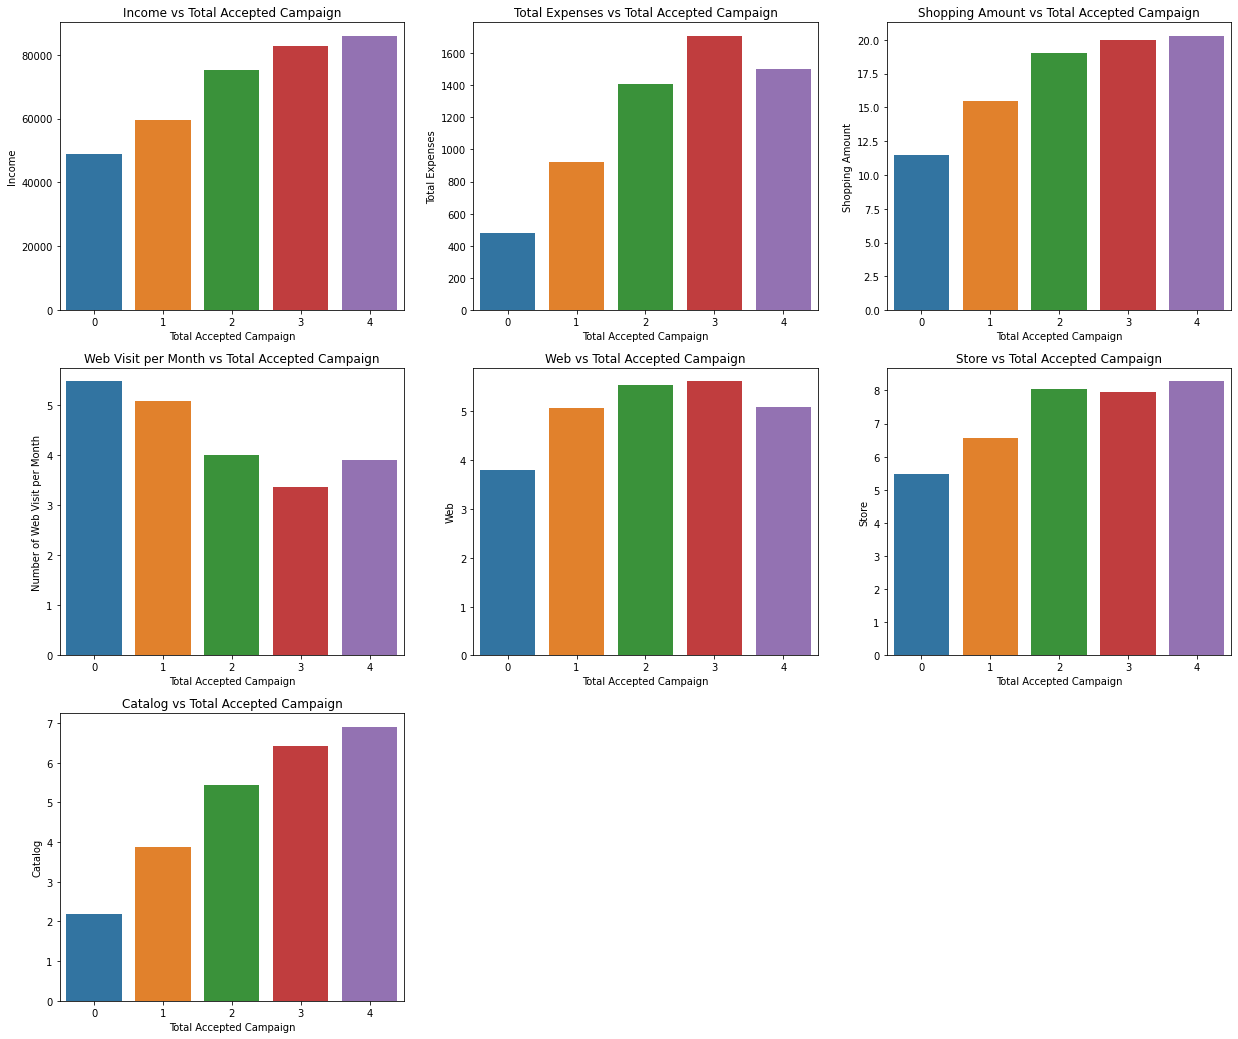

In [109]:
# Grafik Total_Accepted_Campaign : Income, Total_Expenses, Shopping Amount, Web_Visit_Month

plt.figure(figsize = (21,18))

# Income
plt.subplot (3,3,1)
sns.barplot(data = df, x = 'Total_Accepted_Campaign', y = 'Income', order = [0,1,2,3,4], ci= None)
plt.title('Income vs Total Accepted Campaign')
plt.ylabel('Income')
plt.xlabel('Total Accepted Campaign')

# Total_Expense
plt.subplot (3,3,2)
sns.barplot(data = df, x = 'Total_Accepted_Campaign', y = 'Total_Expenses', order = [0,1,2,3,4], ci= None)
plt.title('Total Expenses vs Total Accepted Campaign')
plt.ylabel('Total Expenses')
plt.xlabel('Total Accepted Campaign')

# Shopping Amount
plt.subplot (3,3,3)
sns.barplot(data = df, x = 'Total_Accepted_Campaign', y = 'Shopping_Amount', order = [0,1,2,3,4], ci= None)
plt.title('Shopping Amount vs Total Accepted Campaign')
plt.ylabel('Shopping Amount')
plt.xlabel('Total Accepted Campaign')

# Web Visit Month
plt.subplot (3,3,4)
sns.barplot(data = df, x = 'Total_Accepted_Campaign', y = 'Web_Visit_Month', order = [0,1,2,3,4], ci= None)
plt.title('Web Visit per Month vs Total Accepted Campaign')
plt.ylabel('Number of Web Visit per Month')
plt.xlabel('Total Accepted Campaign')

# Web
plt.subplot (3,3,5)
sns.barplot(data = df, x = 'Total_Accepted_Campaign', y = 'Web', order = [0,1,2,3,4], ci= None)
plt.title('Web vs Total Accepted Campaign')
plt.ylabel('Web')
plt.xlabel('Total Accepted Campaign')

# Web
plt.subplot (3,3,6)
sns.barplot(data = df, x = 'Total_Accepted_Campaign', y = 'Store', order = [0,1,2,3,4], ci= None)
plt.title('Store vs Total Accepted Campaign')
plt.ylabel('Store')
plt.xlabel('Total Accepted Campaign')

# Web
plt.subplot (3,3,7)
sns.barplot(data = df, x = 'Total_Accepted_Campaign', y = 'Catalog', order = [0,1,2,3,4], ci= None)
plt.title('Catalog vs Total Accepted Campaign')
plt.ylabel('Catalog')
plt.xlabel('Total Accepted Campaign')

plt.show();

Insight :
- Semakin tinggi rata-rata income konsumen dan jumlah konsumen berbelanja, semakin tinggi jumlah total accepted campaignnya.
- Konsumen dengan total accepted campaign sebanyak 3 memiliki rata-rata pengeluaran total tertinggi, dan rata-rata jumlah kunjungan website perbulan terendah. (Pembelian dan penerimaan campaign terjadi pada platform selain website)
- Secara garis besar, Semakin tinggi rata-rata pengeluaran total , semakin tinggi jumlah total accepted campaignnya.
- Secara garis besar, Semakin rendah rata-rata jumlah kunjungan website perbulan , semakin tinggi jumlah total accepted campaignnya. (Seperti yang kita ketahui, platform yang paling sering digunakan adalah Store, sehingga sangat memungkinkan campaign diterima paling besar melalui store)
- Semakin tinggi rata-rata jumlah konsumen berbelanja melalui store dan catalog, semakin tinggi jumlah total accepted campaignnya.
- Secara garis besar, Semakin tinggi jumlah konsumen berbelanja melalui web, semakin tinggi jumlah total accepted campaignnya.

In [110]:
Hub_Kategorikal[(Hub_Kategorikal['Faktor_1'] == 'Total_Accepted_Campaign')|(Hub_Kategorikal['Faktor_2'] == 'Total_Accepted_Campaign')]

Faktor_1                 Faktor_2   Hubungan
7     Income_Classification  Total_Accepted_Campaign  Dependent
12                 Children  Total_Accepted_Campaign  Dependent
15       Biggest_Allocation  Total_Accepted_Campaign  Dependent
18  Total_Accepted_Campaign                 Response  Dependent
19  Total_Accepted_Campaign          Frequently_Used  Dependent

Variabel yang dianalisa :
- Total_Accepted_Campaign : Response, Frequently Used
- Income Classification, Children, Biggest_Allocation : Total_Accepted_Campaign

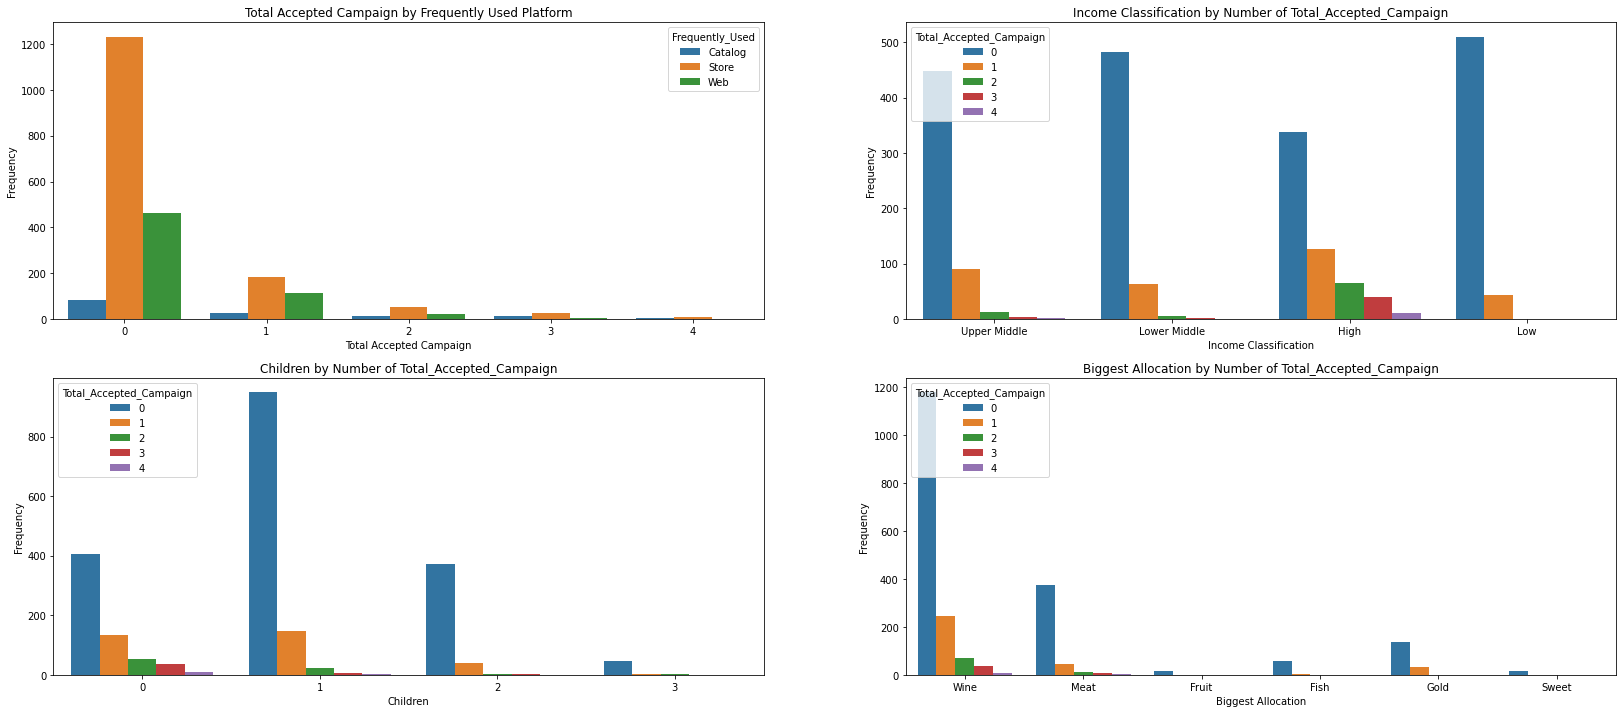

In [111]:
# Total_Accepted_Campaign : Frequently Used, Income, Children, Biggest Allocation
plt.figure(figsize = (28,12))

# Frequently_Used
plt.subplot (2,2,1)
sns.countplot(data = df, x = 'Total_Accepted_Campaign', hue = 'Frequently_Used')
plt.title('Total Accepted Campaign by Frequently Used Platform')
plt.ylabel('Frequency')
plt.xlabel('Total Accepted Campaign')

# Income
plt.subplot (2,2,2)
sns.countplot(data = df, x = 'Income_Classification', hue = 'Total_Accepted_Campaign')
plt.title('Income Classification by Number of Total_Accepted_Campaign')
plt.ylabel('Frequency')
plt.xlabel('Income Classification')

# Children
plt.subplot (2,2,3)
sns.countplot(data = df, x = 'Children', hue = 'Total_Accepted_Campaign')
plt.title('Children by Number of Total_Accepted_Campaign')
plt.ylabel('Frequency')
plt.xlabel('Children')

# Biggest Allocation
plt.subplot (2,2,4)
sns.countplot(data = df, x = 'Biggest_Allocation', hue = 'Total_Accepted_Campaign')
plt.title('Biggest Allocation by Number of Total_Accepted_Campaign')
plt.ylabel('Frequency')
plt.xlabel('Biggest Allocation')

plt.show();

Insight :
- Semakin sering konsumen berbelanja, semakin besar kecenderungan konsumen untuk tidak menerima campaign.
- Proporsi terbesar pada konsumen yang tidak menerima campaign berasal dari konsumen yang sering berbelanja melalui catalog.
<br><br>
- Semakin tinggi tingkat pendapatan konsumen, semakin besar kecenderungannya untuk menerima campaign.
- Jumlah campaign terbesar yang diterima oleh konsumen dengan tingkat pendapatan low adalah 1. 
- Jumlah campaign terbesar yang diterima oleh konsumen dengan tingkat pendapatan lower middle adalah 3. 
- Jumlah campaign terbesar yang diterima oleh konsumen dengan tingkat pendapatan upper middle adalah 4. 
- Jumlah campaign terbesar yang diterima oleh konsumen dengan tingkat pendapatan high adalah 4. 
<br><br>
- Konsumen yang tidak memiliki anak paling sering menerima campaign.
- Secara garis besar, semakin banyak jumlah anak yang dimiliki, konsumen semakin cenderung tidak menerima campaign. (anomali hanya terjadi pada kalangan konsumen tanpa anak)
<br><br>
- konsumen yang paling banyak menerima campaign adalah konsumen dengan biggest allocation pada wine dan meat.
- konsumen yang tidak menerima campaign adalah konsumen dengan biggest allocation pada fruit dan sweet.<br>
(Hal ini mungkin saja terjadi karena campaign lebih difokuskan pada produk wine dan meat, atau orang-orang yang sering membeli wine dan meat kebanyakan berada pada tingkat ekonomi menengah keatas, sehingga lebih sering berbelanja dan menerima campaign)


Valuable Insight :

1. Karakteristik Frequent Buyer (dari segi proporsi) untuk setiap kategori produk
    - Wine :
        - Income_Classification : upper mid
        - Education : Graduation, PhD, Master, dan 2n Cycle
        - Marital_Status : Single
        - Children : 1
        - Age : avg. age between 45 - 50 y/o
        - Platform : Store, Web
        - Max Campaign Accepted : 4
<br><br>
    - Fruit :
        - Income_Classification : low
        - Education : Graduation and Basic
        - Marital_Status : Single
        - Children : 0
        - Age : avg. age between 35 - 40 y/o
        - Platform : Store, Web
        - Max Campaign Accepted : 0
<br><br>
    -  Gold :
        - Income_Classification : low
        - Education : Graduation, Basic, and 2n Cycle
        - Marital_Status : Single
        - Children : 1
        - Age : avg. age between 40 - 45 y/o
        - Platform : Store, Web
        - Max Campaign Accepted : 0
<br><br>
    - Meat :
        - Income_Classification : High
        - Education : Graduation, PhD, Master, dan 2n Cycle
        - Marital_Status : Single
        - Children : 0
        - Age : avg. age between 40 - 45 y/o
        - Platform : Store, Web, Catalog
        - Max Campaign Accepted : 4        
<br><br>
    - Fish       :
        - Income_Classification : low
        - Education : Graduation, 2n Cycle, Basic
        - Marital_Status : Single
        - Children : 1
        - Age : avg. age between 40 - 45 y/o
        - Platform : Store, Web
        - Max Campaign Accepted : 1
<br><br>
    - Sweet       :
        - Income_Classification : low
        - Education : Graduation, Basic
        - Marital_Status : Single
        - Children : 0
        - Age : avg. age between 45 - 50 y/o
        - Platform : Store, Web
        - Max Campaign Accepted : 0
<br><br>

2. Karakteristik Konsumen dengan Total Expenses tertinggi
    - Income_Classification : High
    - Education : PhD
    - Marital_Status : Single
    - Children : 0
    - Age : avg. age between 45 - 50 y/o
    - Platform : Store, Web, Catalog
    - Max Campaign Accepted : 4
<br><br>

3. Karakteristik Top Buyer dari segi amount ($) untuk setiap kategori produk
    - Wine :
        - Income_Classification : high
        - Education : PhD
        - Marital_Status : Single
        - Children : 0
        - Age : avg. age between 45 - 50 y/o
        - Platform : Store, Web, Catalog
        - Max Campaign Accepted : 4
<br><br>
    - Fruit :
        - Income_Classification : high
        - Education : Graduation
        - Marital_Status : Single
        - Children : 0
        - Age : avg. age between 35 - 40 y/o
        - Platform : Store, Web, Catalog
        - Max Campaign Accepted : 4
<br><br>
    -  Gold :
        - Income_Classification : high
        - Education : Graduation
        - Marital_Status : Single
        - Children : 0
        - Age : avg. age between 40 - 45 y/o
        - Platform : Store, Web, Catalog
        - Max Campaign Accepted : 4
<br><br>
    - Meat :
        - Income_Classification : high
        - Education : Graduation
        - Marital_Status : Single
        - Children : 0    
        - Age : avg. age between 40 - 45 y/o
        - Platform : Store, Web, Catalog 
        - Max Campaign Accepted : 4   
<br><br>
    - Fish       :
        - Income_Classification : high
        - Education : 2n Cycle
        - Marital_Status : Single
        - Children : 0
        - Age : avg. age between 40 - 45 y/o
        - Platform : Store, Web, Catalog   
        - Max Campaign Accepted : 4
<br><br>
    - Sweet       :
        - Income_Classification : high
        - Education : 2n Cycle
        - Marital_Status : Single
        - Children : 0
        - Age : avg. age between 45 - 50 y/o
        - Platform : Store, Web, Catalog  
        - Max Campaign Accepted : 4 
<br><br>

Kesimpulan :

1. faktor yang mempengaruhi perilaku konsumen dalam melakukan pembelian produk adalah
    - Income
    - Education
    - Marital Status
    - Children
    - Age

2. Pembahasan dari segi income :
    - Konsumen dengan pendapatan yang tinggi cenderung mengalokasikan pengeluarannya pada produk wine dan meat. 
    - Konsumen dengan pendapatan yang rendah cenderung mengalokasikan pengeluarannya pada produk fruit dan sweet. 
    - Sedangkan, konsumen dengan pendapatan menengah akan lebih mengalokasikan pengeluarannya secara tersebar, namun lebih banyak pada wine, meat, gold dan fish.
    - Konsumen dengan income yang low lebih suka berbelanja pada store dan web.
    - Konsumen dengan income tinggi dan menengah berbelanja pada store, web dan catalog.
    - Kebanyakan konsumen lebih menyukasi berbelanja di store.
    - Konsumen yang paling banyak berbelanja di Store adalah konsumen dengan klasifikasi income low.
    - Konsumen yang paling banyak berbelanja di Web adalah konsumen dengan klasifikasi income lower middle.
    - Konsumen yang paling banyak berbelanja di Catalog adalah konsumen dengan klasifikasi income high.
    - Semakin tinggi income konsumen, maka akan semakin besar kecenderungan konsumen untuk menerima iklan, begitupula sebaliknya.

    Pembahasan dari segi Education :
    - Konsumen dengan tingkat pendidikan yang tinggi (PhD, Master) cenderung mengalokasikan pengeluarannya pada produk wine dan meat. 
    - Konsumen dengan tingkat pendidikan yang biasa (Graduation, Basic) cenderung mengalokasikan pengeluarannya pada produk fruit, sweet dan gold. 
    - Sedangkan, konsumen dengan pendapatan menengah akan lebih mengalokasikan pengeluarannya secara tersebar, namun lebih banyak pada wine, meat, gold dan fish.
    - Konsumen dengan tingkat pendidikan Basic lebih sering berbelanja pada store dan web, tidak pernah melalui catalog.
    - konsumen dengan tingkat pendidikan PhD, Master, 2n Cycle, dan Graduation lebih sering berbelanja pada store dan web, namun meskipun frekuensi nya sedikit, mereka masih berbelanja melalui catalog.

    Pembahasan dari segi Marital_Status :
    - konsumen dengan status perkawinan 'Single' memiliki total_expenses yang lebih tinggi dibandingkan dengan yang 'Together'
    - konsumen dengan status perkawinan 'Single' memiliki rata-rata pengeluaran yang lebih besar pada setiap produk dibandingkan dengan yang 'Together'
    - Namun jika dilihat dari persentase pendapatan, perusahaan mendapatkan pemasukan lebih besar dari konsumen dengan status 'Together', hal ini dikarenakan <br>
      konsumen dengan status Together memiliki jumlah yang jauh lebih banyak (hampir 2x lipat) dari yang 'Single'. 
    - konsumen dengan status perkawinan 'Single' maupun 'Together' lebih banyak mengalokasikan pengeluarannya pada produk wine dan meat.
    - 

    Pembahasan dari segi Children :
    - Konsumen yang tidak memiliki anak meiliki total_expenses yang lebih tinggi dibandingkan dengan yang 'Together'.
    - Semakin banyak anak dari seorang konsumen, total expensesnya akan semakin rendah.
    - Konsumen yang tidak memiliki anak, memiliki anak 1, dan memiliki anak 2 paling banyak mengalokasikan uang belanjanya pada Produk Wine, Meat dan Gold.
    - Konsumen yang memiliki anak 3 paling banyak mengalokasikan uang belanjanya pada Produk Wine dan Meat.
    - Dari segi proporsi, Konsumen dengan semua jumlah anak paling suka berbelanja di Store dan paling sedikit berbelanja di Catalog.
    - Konsumen yang paling banyak berbelanja di Store dan Web adalah konsumen dengan jumlah anak 1.
    - Konsumen yang paling banyak berbelanja di Catalog adalah konsumen dengan jumlah anak 0.
    - Konsumen dengan jumlah anak 3 hanya berbelanja melalui store dan web.
    - semakin banyak anak yang dimiliki, konsumen cenderung semakin jarang menerima promosi.

    Pemabahsan dari segi Age :
    - Semakin tua seorang konsumen (rata-rata usia mendekati 50 tahun), akan lebih sering berbelanja melalui catalog dan web.
    - Store lebih banyak dikunjungi oleh konsumen umur 45 tahun kebawah.

Rekomendasi :

Strategi Pemasaran

- untuk produk wine dan meat (top 2 products) :
    Karena peminatnya lebih banyak berada pada tingkat income dan edukasi yang menengah keatas, status single, jumlah anak tidak lebih dari 1, dan paling sering menggunakan platform store dan web untuk berbelanja.<br>
    Maka strategi pemasaran yang tepat adalah melalui campaign yang lebih difokuskan pada Store, web dan sedikit pada catalog.<br>
    Serta seperti yang diketahui, mayoritas konsumen adalah konsumen dengan status Together, sehingga kita bisa lebih memaksimalkan pemasaran pada kaum single dengan umur 20-35 tahun.
    Hal ini dapat ditunjang dengan melakukan analisa lebih lanjut terhadap perilaku konsumen yang single.
    contoh : kemungkinan besar kaum single yang tinggal sendiri akan lebih suka pada sesuatu yang cepat dan simple, kita bisa melakukan campaign untuk free delivery untuk jarak tertentu dan mengoptimalkan penjualan pada website yang akan mempermudah pembelian produk. Atau menyediakan bundling paket meat yang siap masak.
    <br><br>
    untuk konsumen dengan status together, kita dapat mengadakan lebih banyak campaign terkait dengan bundling atau quantity discount. Hal ini dapat membantu untuk kehidupan konsumen yang tinggal bersama orang lain, karena tingkat kebutuhan hidup pun akan meningkat.
    <br><br>
- untuk produk gold dan fish :
    kita dapat lebih menyasar konsumen dengan tingkat ekonomi dan edukasi menengah keatas. Campaign yang dilakukan lebih baik berfokus pada store dan web.
    <br><br>
- untuk produk fruit dan sweet :
    Karena peminatnya lebih banyak berada pada tingkat income dan edukasi yang rendah, status single, jumlah anak tidak lebih dari 1, dan paling sering menggunakan platform store dan web untuk berbelanja.<br>
    Maka strategi pemasaran yang tepat adalah melalui campaign yang lebih difokuskan pada web dan store.<br>
    Pihak perusahaan mungkin dapat mengadakan campaign promo untuk produk-produk fruit dan sweet pada platform yang paling sering digunakan yaitu Store.


Rantai Pasok :

- Pada cabang store di daerah yang tingkat pendapatan dan edukasi masyarakatnya cukup tinggi, alokasikan lebih banyak meat dan wine, seperti cabang store pada daerah ibukota
- Pada cabang store di daerah yang tingkat pendapatan dan edukasi masyarakatnya cukup rendah, alokasikan lebih banyak sweet dan fruits, seperti cabang store daerah-daerah yang masih sedikit terpencil
- Pada cabang store di daerah yang tingkat pendapatan dan edukasi masyarakatnya menengah, alokasikan lebih banyak meat, gold, dan fish, seperti cabang store daerah-daerah yang sedang berkembang
- dengan kapasitas yang terbatas, perusahaan ada baiknya mengalokasikannya lebih maksimal pada produk wine, meat dan gold.